# **Análise exploratória e machine learning**

## *Sobre o conjunto de dados*

Fonte: [kaggle](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent)

Descrição: *Este dataset possui 6079 casas para alugar com 13 classes diferentes.[...] Tendo em vista que foi utilizado um WebCrawler apenas para pegar os dados, os mesmos estão sujeitos a problemas como erros no cadastros.*

## **Motivação**

A empresa de seguros Seguros S.A. - já difunfida no mercado de seguro contra roubo de carga -, decidiu expandir seu portifólio, e pretende iniciar no mercado de seguro contra incêndio para imóveis alugados nos próximos 8 (oito) meses. O mercado se apresentou promissor diante das estatísticas ([ver](https://g1.globo.com/economia/noticia/2022/02/15/censo-da-moradia-70percent-dos-brasileiros-moram-em-imoveis-proprios-diz-quintoandar.ghtml)), e, também, pelo fato de que mesmo sendo um mercado super-concorrido, sempre haverá demanda, haja vista o seguro contra incêndio ser obrigatório por lei, conforme art. 22, VIII da Lei 8.245/91.

Assim, visando desenvolver uma estratégia de preços, a Seguros S.A. pretende conhecer o mercado, e obter as seguintes respostas:

1.  


# Carregando bibliotecas


In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import re

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from typing import Union

from pandas.core.computation.ops import isnumeric

from pandas.core.arrays import numeric

from matplotlib import cm

import warnings

import statsmodels.api as sm

from statsmodels.graphics.gofplots import qqplot

from scipy import stats

In [2]:
# Configurando ambiente de análise

sns.set(style="whitegrid", context="talk", font_scale=0.8, rc={"figure.figsize": (20, 8)})

warnings.filterwarnings('ignore')

# Carregando e visualizando base de dados.

In [3]:
# Lendo
data = pd.read_csv('./houses_to_rent_v2.csv.')

In [4]:
# Visualizando
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [5]:
# Renoemando atributo 'floor'

data.columns = ['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floors',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']

# Dicionário de dados

- Obtido na documentação [disponível](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent).

| Atributo | Tipo de dado | Descrição |
|----------|--------------|-----------|
| city     | char         | Cidade onde o imóvel está localizada |
| area     | numeric         | Area do imovel |
| rooms     | numeric         | Numero de quartos |
|bathroom | numeric | Numero de banheiros |
| parking spaces     | numeric         | Numero de vagas |
| floor     | numeric         | Andar |
| animal     | char         | Aceita animais? |
| furniture     | char         | Mobilhada? |
| hoa (R\$)| numeric         | Valor do condomínio(em reais) |
| rent amount (R\$)	     | numeric         | Valor do aluguel(em reais) |
| property tax (R\$)     | numeric         | IPTU (imposto)(em reais) |
| fire insurance (R$)     | numeric         | Seguro incêndio(em reais)
|total (R\$) | numeric | Valor Total (em reais)



Trata-se de base de dados com informações que envolvem aluguel de imóvel. As informações dispónives ajudaram a responder às questões de negócio levantadas, e, observando que vieram acompanhadas do atributo 'fire insurance (R$)', serão úteis para modelos machine learning, de aprendizagem supervisionada.

Percebe-se a necessidade de limpar os dados, antes de analisá-los, vez que possui espaços em branco, caracteres especiais, etc, tanto nos rótulos do atributos, quanto na própria base.

A seguir, instanciaremos a base na classe criada para realizar este trabalho.

Não descartaremos nenhum dado ou atributo, a princípio, esta necessidade será verificada no decorrer da análise.

# Esclarecimentos

Verificando a necessidade de pré-processamento, e, estabelecidos os objetivos da análise, aplocaremos POO (programação orientada a objetos) à todas as fases da análise.

Foram criadas classes, com métodos e atributos específicos para este dataset, e, para o fluxo de trabalho, nesta ordem:

Pré-processamento > Análise exploratória e Data-wrangling > Machine Learning.

  - As classes herdam os atributos e métodos das criadas para a classe antecessora.

  - O fluxo acima poderá ser repetido quantas vezes foram necessário para se obter os resutados desejados.



### Classe para análise exploratória
#### Classe para pré-processamento

In [6]:

#criar classe aqui
class pre_processing(object):
    
    def __init__(self, dataframe = pd.DataFrame):
        
        self.data = pd.DataFrame(dataframe)
        
        self.data = self._empty_replace_columns()

        
    def _empty_replace_columns(self):
        
        self.data.columns = [i.replace(" ", "_") for i in data.columns]
        
        self.data.columns = [i.split("(R$)")[0] for i in data.columns]
        
        for coluna in self.data.select_dtypes('object').columns:
        
            self.data[coluna] = self.data[coluna].apply(lambda x: x.replace(" ", "_"))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: x.lower())
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[áàãâä]', 'a', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[éèêë]', 'e', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[íìîï]', 'i', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[óòõôö]', 'o', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[úùûü]', 'u', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[ç]', 'c', x))
        
        return self.data
    


### Classe para data wrangling.

In [7]:

class data_wrangling(pre_processing):
    
    def __init__(self, dataframe = pd.DataFrame):
       
        pre_processing.__init__(self, dataframe) #dataframe
       
        self.numeric_attributes = self._numeric_attributes()
        
        self.char_attributes = self._char_attributes()
        
        self.dataframe_out = self._drop_outliers()

        

    def tipagem(self, atributos: list = str, new_type: list = type):

      for atributo, types in zip(atributos, new_type):

        self.data[atributo] = self.data[atributo].apply(lambda x: types(x))

      self.numeric_attributes = self._numeric_attributes()

      self.char_attributes = self._char_attributes()

      temp_df = self._drop_outliers()
      
      self.dataframe_out = temp_df


      

    # Este método percorrerá todos os atributos tipados como numéricos, e verificará
    # a existência de elemento não numérico em seus dados    
    def verify_type_num(self):
      
      dado = {}
      
      for col in self.numeric_attributes:
      
        for item in self.data[col]:
      
          if not isnumeric(type(item)):
      
            dado[col] = item
      
      return pd.DataFrame(dado).reset_index(drop = True)

    # Este método percorrerá todos os atributos tipados como character|object, e verificará
    # a existência de elementos que não sejam alfa-numéricos em seus dados 
    def verify_type_char(self):        
     
      #verificar caracteres especuais 
     
      dado = {}
     
      for col in self.char_attributes:
     
        dado[col] = self.data[col].apply(lambda x: x if x in ['-', '*', '.'] else None)
     
      return pd.DataFrame(dado).drop_duplicates().reset_index(drop = True)


    def _numeric_attributes(self) -> list:
        
        colunas = self.data.columns
        
        numeric_attributes = list(filter(lambda col: self.data[col].dtype in ['int64', 'float64'], colunas))
        
        return numeric_attributes

    
    def _char_attributes(self) -> list:
        
        colunas = self.data.columns
        
        char_attributes = list(filter(lambda col: self.data[col].dtype  == "object", colunas))
        
        return char_attributes


    def count_unique_numeric(self):
       
        #contagem de valores unicos, por variável numérica
       
        unique_values = {}
       
        for col in self.numeric_attributes:
       
            unique = len(self.data[col].drop_duplicates())
       
            unique_values['{}'.format(col)] = unique
       
       
        data_unique_num = pd.DataFrame(unique_values, index = ['unique_values']).T
       
        describe_numeric = self.data.select_dtypes(['int', 'float']).describe().T
       
        count = pd.concat([describe_numeric, data_unique_num], axis = 1, join = 'inner')

        return count


    def count_unique_char(self):
       
        #contagem de valores unicos, por variável categoricos
       
        return self.data.select_dtypes('object').describe().T

         
    def ver_nome(self, atributo = str):
       
        print(pd.DataFrame(self.data[atributo].drop_duplicates().sort_values()).reset_index(drop = True))

        
    def na_values(self):
        
        print(pd.DataFrame(self.data.isnull().any()))
        
                      
    def drop_values(self, coluna: str, value: Union[str, int, float]) -> pd.DataFrame:
      
      clean_data = self.data.copy(deep = True)
      
      clean_data = clean_data.query('{} != "{}"'.format(coluna, value)).reset_index(drop = True)

      setattr(self, 'data', clean_data)

      self.dataframe_out = self._drop_outliers()


    def _drop_outliers(self):
      
        new_df = self.data.copy(deep = True)
      
        for i in self.numeric_attributes:
      
            desvio = self.data[i].std()
      
            limite_superior = self.data[i].mean() + 3*desvio
      
            limite_inferior = self.data[i].mean() - 3*desvio
      
            new_df = new_df.query("@limite_inferior <= {} <= @limite_superior".format(i))
      
    
        return new_df

##### DATA-VIZ


    def hist_boxplot(self, coluna: str):
      
            fig, axs = plt.subplots(1,2)
      
            grafico1 = sns.histplot(data=self.data, x = '{}'.format(coluna), ax = axs[0])
      
            grafico1.set(title = 'Distribuição de frequências - {}'.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
      
            grafico2 = sns.boxplot(data=self.data, x = '{}'.format(coluna), ax = axs[1])
      
            grafico2.set(title = 'Boxplot de frequências - {}'.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
            
    
    def outliers_in_out(self, coluna: str, hist_or_boxplot: ['hist', 'boxplot'], categoria = None):
      
        tipo_grafico = hist_or_boxplot
      
        if tipo_grafico == 'hist':
      
                fig, axs = plt.subplots(1,2)
      
                grafico1 = sns.histplot(data=self.data, x = '{}'.format(coluna), ax = axs[0])
      
                grafico1.set(title = 'Frequências com outliers - {} '.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
      
                grafico2 = sns.histplot(data=self.dataframe_out, x = '{}'.format(coluna), ax = axs[1])
      
                grafico2.set(title = 'Frequências sem outliers - {} '.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
      
        elif tipo_grafico == 'boxplot':
      
                fig, axs = plt.subplots(1,2)
      
                grafico1 = sns.boxplot(data=self.data, y = '{}'.format(coluna), x = categoria, ax = axs[0])
      
                grafico1.set(title = 'Frequências com outliers - {} '.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
      
                grafico2 = sns.boxplot(data=self.dataframe_out, y = '{}'.format(coluna), x = categoria, ax = axs[1])
      
                grafico2.set(title = 'Frequências sem outliers - {} '.format(coluna), xlabel = '{}'.format(coluna), ylabel = 'Frequência')
      
        else:
      
            print("Você escolheu um tipo errado. Escolha entre 'hist' ou 'boxplot'")
            
    
    def bar_graphic(self, atributo: str, categoria: str, drop_outlier: bool = True, hue: str = None):
      
        if drop_outlier:
          
          grafico = sns.barplot(data = self.dataframe_out, y = atributo, x = categoria, hue = hue, ci = None)  
        
        else:

          grafico = sns.barplot(data = self.dataframe_out, y = atributo, x = categoria, hue = hue, ci = None)

        grafico.set(title = f'{atributo} por {categoria}', ylabel = f'{atributo}', xlabel = f'{categoria}')



    def pie_chart(self, atributo: str, group: str, summarise: str = 'sum'):

      dados = self.dataframe_out.copy(deep = True)

      dados = dados[[f'{atributo}', f'{group}']].groupby(by = group).agg(f'{summarise}')

      dados['relative'] = dados[f'{atributo}'].apply(lambda x: round(x / dados[f'{atributo}'].sum() * 100, 2))

      labels = [str(i) + " " + '[' + str(dados.loc[f'{i}', 'relative']) + "%" + "]" for i in dados.index]
      
      cs = cm.Set3(np.arange(100))
    
      f = plt.figure(figsize=(10,5))

      plt.pie(dados['relative'], labeldistance = 1, radius= 3, colors = cs, wedgeprops = dict(width = 0.8))

      plt.legend(labels = labels, loc = "center", prop = {'size':12})

      plt.title("{} por /\n {}".format(atributo, group), loc = "Center", fontdict = {"fontsize": 17, "fontweight":17})
      
      plt.show()

    
    
    

    def cor_matrix(self, atributos: list = None, coeficiente: str = 'pearson'):
      
      if atributos is None:
        
        atributos = self.numeric_attributes

      data = self.dataframe_out[atributos].corr(method = f'{coeficiente}')

      sns.heatmap(data = data, annot = True, cmap='hot')

    
    def pair_plots(self, atributos: list = None):

      if atributos is None:

        atributos = self.numeric_attributes

      with sns.axes_style('whitegrid'):

        grafico1 = sns.pairplot(data = self.dataframe_out[atributos], diag_kind='kde', corner = True)

        grafico1.map_lower(sns.kdeplot, levels=4, color=".2")


    def scatterplots(self, x: str, y: str, hue: str = None):

      grafico = sns.scatterplot(data = self.dataframe_out, x = x, y = y, hue = hue)

      grafico.set(title = f'Relação entre {x} e {y}', xlabel = f'{x}', ylabel = f'{y}')

      if hue is not None:

          grafico.get_legend().set_title(f'{hue}')

    #incluir estatisticas basicas nesta classe     - ver referências

### Para machine learning
#### Classe para padronização de variáveis (numéricas e categóricas)

In [8]:
#criar classe de pré-processamento da variáveis para modelos aqui

class standardize_code(data_wrangling):
    
    def __init__(self, dataframe = pd.DataFrame, continuous_var: list = False, target = False):
  
        data_wrangling.__init__(self, dataframe) #dataframe
        
        self.continuous_var = continuous_var
        
        self.target = target
        
        
    def standardize(self, just_char: bool = False) -> pd.DataFrame:
  
        if not just_char:

            standardized_df = self.dataframe_out.copy(deep = True)
      
            for i in self.continuous_var:
      
                if i == self.target:
      
                    continue
      
                else:
      
                    media = standardized_df[i].mean()
      
                    desvio = standardized_df[i].std()
      
                    standardized_df[i] = standardized_df[i].apply(lambda x: (x - media) / desvio)
            
            #codificando atributos categóricos
      
            for col in self.char_attributes:
      
                for dado in standardized_df[col].drop_duplicates():
      
                    standardized_df[col + "_" + dado + '_code'] = standardized_df[col].apply(lambda x: 1 if x == dado else 0)
      
            standardized_df.drop(self.char_attributes, axis = 1, inplace = True)
  
        elif just_char:

            standardized_df = self.dataframe_out.copy(deep = True)
      
            for col in self.char_attributes:
      
                for dado in standardized_df[col].drop_duplicates():
      
                    standardized_df[col + "_" + dado + '_code'] = standardized_df[col].apply(lambda x: 1 if x == dado else 0)
      
            standardized_df.drop(self.char_attributes, axis = 1, inplace = True)
                    
        setattr(self, "standardized_df", standardized_df)
  
        
          

      

### Classe para realizar agrupamento

In [9]:
#criar classe de clusters aqui

class cluster(standardize_code):
    
    def __init__(self, dataframe = pd.DataFrame):
 
        standardize_code.__init__(self, dataframe) #dataframe
        

    def elbow_method(self, range_n : int = 10, data_specify: list = None): 
 
      if data_specify == None:
        
        data_k = self.standardized_df.copy(deep = True)
 
      else:
        
        data_k = self.standardized_df[data_specify].copy(deep = True)
        
      wcss = []
 
      for k in range(1,range_n):
 
        model = KMeans(n_clusters = k).fit(data_k)
 
        wcss.append(model.inertia_)
 
      #Calculating the variance ratio
 
      variance_ratios = [wcss[i]/wcss[i-1] for i in range(1,range_n-1)]
 
      optimal_k = variance_ratios.index(min(variance_ratios)) + 2
 
      #visualizando
 
      grafico = sns.lineplot(x = range(1,range_n), y = wcss, marker = '8', palette = 'pastel')
 
      print(f'O número de clusters considerado ótimo, pelo cálculo de razão de variância é {optimal_k} \n')
 
      setattr(self, 'optimal_k',optimal_k)


    def k_means(self, clusters = int, data_specify: list = None) -> pd.DataFrame:
 
      if data_specify == None:
        
        data_k = self.standardized_df.copy(deep = True)
 
      else:
        
        data_k = self.standardized_df[data_specify].copy(deep = True)
 
      model = KMeans(n_clusters = clusters).fit(data_k)
 
      clusters_label = pd.DataFrame(model.labels_, columns=['cluster'])
    
      center = pd.DataFrame(model.cluster_centers_)
 
      print(clusters_label)
    
      clustered = pd.concat([data_k, clusters_label], axis = 1, join = 'inner')

      setattr(self, "clustered_data", clustered)
        
        

        
    #incluir método para split dos dados de acordo com os clusters e excluir o método df_factors

### Classe para split de dados

In [10]:
#criando classe para segmentar os fatores

class df_factors(cluster):

    def __init__(self, dataframe = pd.DataFrame):

        cluster.__init__(self, dataframe) ##dataframe


    def factors(self, coluna: str):

        fatores = pd.factorize(self.data[coluna])[1]

        for i, fator in enumerate(fatores):

            df = self.data.query('{} == "{}"'.format(coluna, fator)).reset_index(drop = True)

            setattr(self, "df_"+str(fator), df)


### Classe para regressao linear

In [11]:
#criar classe para regressao aqui

class linear_regression(df_factors):

    def __init__(self, dataframe = pd.DataFrame):
 
        df_factors.__init__(self, dataframe)


    def bases(self, atributos: list = None, test_size: float = 0.25): 
 
            if atributos is None:
        
                atributos = self.standardized_df.columns
            
            base = self.standardized_df[atributos].copy(deep = True)

            preditores_treino, preditores_teste, target_treino, target_teste = train_test_split(

                base.drop(['{}'.format(self.target)], axis = 1),

                base['{}'.format(self.target)],

                test_size = test_size,

                random_state = 123

                )

            setattr(self, 'preditor_treino', preditores_treino)

            setattr(self, 'preditor_teste', preditores_teste)

            setattr(self, 'target_treino', target_treino)

            setattr(self, 'target_teste', target_teste)
            
        
    def model_regression_stats(self):
        
        x = self.preditor_treino

        y = self.target_treino

        x_sm = sm.add_constant(x)

        results = sm.OLS(y, x_sm).fit()
        
        setattr(self, 'resultado', results.summary())
        
        #predict = pd.DataFrame(results.predict(self.preditor_teste), columns=['Predicao_1'])

        grafico_distribuicao =  fig, ax = plt.subplots(1,2)
        
        sns.distplot(results.resid, ax = ax[0])
        
        sm.qqplot(results.resid, stats.norm, fit = True, line = '45', ax = ax[1])
        
        setattr(self, "grafico_residuos", grafico_distribuicao)
        
        
        
        
    def linear_regression_skelearn(self):

        model = LinearRegression().fit(self.preditor_treino, self.target_treino)

        target_predict = model.predict(self.preditor_teste)

        rmse = np.sqrt(mean_squared_error(self.target_teste, target_predict))

        coeficientes = pd.DataFrame(model.coef_, columns=['stats'])

        labels_coef = pd.DataFrame(model.feature_names_in_, columns=['labels'])

        stats_labels = pd.concat([labels_coef, coeficientes], axis = 1)
        
        setattr(self, 'rmse_sklearn', rmse.round(2))
        
        setattr(self, 'score', model.score(self.preditor_teste, self.target_teste))




# Dicionário de classes

|CLASSES|FUNCIONALIDADE|FASE|
|------|-------------|------|
|pre_processing()| Elimina espaços em branco, caracteres especiais|Pré-processamento|
|data_wrangling() | Dispõe de métodos para exploração de dados e data-viz|Data-wrangling e data-viz|
|standardize_code() | Padroniza atributos numéricos, e codifica atributos categórios| Machine Learning|
|cluster()|Aplica algoritmos de aprendizado não-supervisionado para clusterização de dados|Machine Learning|
|df_factors| Realiza split de dados (faz splite de DF de acordo com a categoria informada|Machine Learning|
|linear_regression|Faz split de bases (teste-treino), aplica modelo de regressão, e retorna métricas de desempenho|Machine Learning|


# **Análise exploratória de dados**



## **1. Pré-processamento**
#####  - Classe usada: pre_processing()

Como as classes herdam atributos e métodos das classes antecessoras, conforme definido no fluxo desta análise - acima mencionado -, e, uma vez já definido que usaremos o modelo de regressão linear para realizar análise e predições dos dados, vamos instanciar nossos dados na classe linear_regression, e, após, utilizados os métodos e atributos disponívels de todas as demais classes.

Isto otimizará a análise, e evitará confusão entre possíveis slicing de dados que poderemos criar futuramente.

In [12]:
# Visualizando a base da dados orginal
data.head(10)

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


Conforme já verificado, os labels dos atributos possuem espaços em branco, e caracters especiais, a maioria das funções não conseguem lidar com esses caracteres. Para evitar problemas futuros com execução de análises e geração de gráficos, A classe pre-processing aplicou os métodos desenvolvidos para este tratamento.

In [12]:
# Instanciando base de dados na classe 'pre-proce
analise_1 = linear_regression(dataframe = data)

In [14]:
# Visualizando base de dados tratada
analise_1.data.head(10)

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa_,rent_amount_,property_tax_,fire_insurance_,total_
0,sao_paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,sao_paulo,320,4,4,0,20,acept,not_furnished,1200,4960,1750,63,7973
2,porto_alegre,80,1,1,1,6,acept,not_furnished,1000,2800,0,41,3841
3,porto_alegre,51,2,1,0,2,acept,not_furnished,270,1112,22,17,1421
4,sao_paulo,25,1,1,0,1,not_acept,not_furnished,0,800,25,11,836
5,sao_paulo,376,3,3,7,-,acept,not_furnished,0,8000,834,121,8955
6,rio_de_janeiro,72,2,1,0,7,acept,not_furnished,740,1900,85,25,2750
7,sao_paulo,213,4,4,4,4,acept,not_furnished,2254,3223,1735,41,7253
8,sao_paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,rio_de_janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


- Os labels dos atributos não possuem mais do caracter 'R$', nem espaços em branco.

- Os dados das colunas categóricas também tiveram tratamento para espaços em branco, bem como para caracteres com acentos, e 'ç'.

- Entretanto, observa-se que permanece o caracter '-' como dado do atributo 'floor', certamente inserido como formad e tratar a ausência de informação da fonto, especialmente porque os dados foram obtidos com um crowler, conforme citado na [documentação](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent). Vamos tratar deste problema na próxima na análise exploratória dos dados, e decidir como lidar com isto depois de conhecer melhor seu inpacto nos dados.

## **2. Data wrangling**

  ##### - Classe usada: data_wrangling()


In [15]:
# Conhecendo atributos numéricos
analise_1.numeric_attributes

['area',
 'rooms',
 'bathroom',
 'parking_spaces',
 'hoa_',
 'rent_amount_',
 'property_tax_',
 'fire_insurance_',
 'total_']

In [16]:
analise_1.char_attributes

['city', 'floors', 'animal', 'furniture']

Vamos verificar como os valores estão dispostos dentro de cada variável, e, conferir sua respectiva tipagem na base de dados.

In [17]:
# Atributo 'area'
analise_1.ver_nome('area')

      area
0       11
1       12
2       13
3       15
4       16
..     ...
512   1600
513   2000
514  12732
515  24606
516  46335

[517 rows x 1 columns]


In [18]:
# Verificando tipo do atriburo 'area'

analise_1.data['area'].dtype

dtype('int64')

Os dados, do tipo *int*, estão dispostos como numéricos (numérico-contínuo), o que é esperado, vez que a área de um imóvel é obtido através da unidade M2 (metro quadrado).

In [19]:
# Atributo 'rooms'

analise_1.ver_nome('rooms')

    rooms
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     13


In [20]:
# Verificando tipo do atriburo 'rooms'

analise_1.data['rooms'].dtype

dtype('int64')

Os dados, do tipo *int*, estão dispostos como numéricos (numérico-discreto), o que é esperado, vez que a quantidade de quartos de um imóvel se obtem através de contagem, representados por números inteiros.

In [21]:
# Atributo 'rooms'

analise_1.ver_nome('bathroom')

   bathroom
0         1
1         2
2         3
3         4
4         5
5         6
6         7
7         8
8         9
9        10


In [22]:
# Verificando tipo do atriburo 'bathroom'

analise_1.data['bathroom'].dtype

dtype('int64')

Os dados, do tipo *int*, estão dispostos como numéricos (numérico-discreto), o que é esperado, vez que a quantidade de banheiros de um imóvel se obtem através de contagem, representados por números inteiros.

In [23]:
# Atributo 'parking_spaces'

analise_1.ver_nome('parking_spaces')

    parking_spaces
0                0
1                1
2                2
3                3
4                4
5                5
6                6
7                7
8                8
9               10
10              12


In [24]:
# Verificando tipo do atriburo 'parking_spaces'

analise_1.data['parking_spaces'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-discreto), o que é esperado, vez que este atributo representa a quantidade de vagas de garagem disponíveis (e, não a sua área), o que é repesentado por contagem, utilizando-se numeros inteiros.

In [25]:
# Atributo 'hoa_'

analise_1.ver_nome('hoa_')

         hoa_
0           0
1           1
2           3
3          10
4          15
...       ...
1674    32000
1675    81150
1676   200000
1677   220000
1678  1117000

[1679 rows x 1 columns]


In [26]:
# Verificando tipo do atriburo 'parking_spaces'

analise_1.data['hoa_'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-contínuo), entretanto, este não é o tipo de dado ideal para representar valores.
Tratando-se de atributo que representa valor financeiro (em reais- R$), é recomendável que se faça tipagem para *float*.

Desta forma, não haverá perda de informação caso haja necessidade de se lidar com numeros decimais.

In [27]:
# Atributo 'rent_amount_'

analise_1.ver_nome('rent_amount_')

      rent_amount_
0              450
1              460
2              500
3              503
4              505
...            ...
1190         20000
1191         24000
1192         25000
1193         30000
1194         45000

[1195 rows x 1 columns]


In [28]:
# Verificando tipo do atriburo 'rent_amount_'

analise_1.data['rent_amount_'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-contínuo), entretanto, este não é o tipo de dado ideal para representar valores. Tratando-se de atributo que representa valor financeiro (em reais- R$), é recomendável que se faça tipagem para float.

Desta forma, não haverá perda de informação caso haja necessidade de se lidar com numeros decimais.

In [29]:
# Atributo 'property_tax_'

analise_1.ver_nome('property_tax_')

      property_tax_
0                 0
1                 1
2                 2
3                 3
4                 4
...             ...
1238          10830
1239          12500
1240          21880
1241          28120
1242         313700

[1243 rows x 1 columns]


In [30]:
# Verificando tipo do atriburo 'property_tax_'

analise_1.data['property_tax_'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-contínuo), entretanto, este não é o tipo de dado ideal para representar valores. Tratando-se de atributo que representa valor financeiro (em reais- R$), é recomendável que se faça tipagem para float.

Desta forma, não haverá perda de informação caso haja necessidade de se lidar com numeros decimais.

In [31]:
# Atributo 'fire_insurance_'

analise_1.ver_nome('fire_insurance_')

     fire_insurance_
0                  3
1                  4
2                  5
3                  6
4                  7
..               ...
211              305
212              338
213              376
214              451
215              677

[216 rows x 1 columns]


In [32]:
# Verificando tipo do atriburo 'fire_insurance_'

analise_1.data['fire_insurance_'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-contínuo), entretanto, este não é o tipo de dado ideal para representar valores. Tratando-se de atributo que representa valor financeiro (em reais- R$), é recomendável que se faça tipagem para float.

Desta forma, não haverá perda de informação caso haja necessidade de se lidar com numeros decimais.

In [33]:
# Atributo 'total_'

analise_1.ver_nome('total_')

       total_
0         499
1         507
2         508
3         509
4         545
...       ...
5746    95610
5747   222100
5748   233200
5749   316900
5750  1120000

[5751 rows x 1 columns]


In [34]:
# Verificando tipo do atriburo 'total_'

analise_1.data['total_'].dtype

dtype('int64')

Os dados, do tipo int, estão dispostos como numéricos (numérico-contínuo), entretanto, este não é o tipo de dado ideal para representar valores. Tratando-se de atributo que representa valor financeiro (em reais- R$), é recomendável que se faça tipagem para float.

Desta forma, não haverá perda de informação caso haja necessidade de se lidar com numeros decimais.

Conclui-se, após a verificação da tipagem dos dados, que se faz necessária a correção do tipo para os atributos: 

      hoa_
      rent_amount_
      property_tax_
      fire_insure_
      total_


Para estes atributos, atribuiremos o tipo *float*, pelos motivos já expostos.

Ainda, instanciaremos na nossa análise, o nome dos atributos que representam variáveis numéricas do tipo contínuas.

In [13]:
# Atribuindo novo tipo para os atributos listados

lista_atributos = ['hoa_', 'rent_amount_', 'property_tax_', 'fire_insurance_', 'total_' ]
lista_tipos = [float, float, float, float, float]

analise_1.tipagem(atributos=lista_atributos, new_type=lista_tipos)

In [14]:
# Instanciando nomes das variáveis-contínuas

analise_1.continuous_var = ['hoa_', 'rent_amount_', 'property_tax_', 'fire_insurance_', 'total_', 'area']

In [37]:
# Verificando tipagem das classes

analise_1.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             10692 non-null  object 
 1   area             10692 non-null  int64  
 2   rooms            10692 non-null  int64  
 3   bathroom         10692 non-null  int64  
 4   parking_spaces   10692 non-null  int64  
 5   floors           10692 non-null  object 
 6   animal           10692 non-null  object 
 7   furniture        10692 non-null  object 
 8   hoa_             10692 non-null  float64
 9   rent_amount_     10692 non-null  float64
 10  property_tax_    10692 non-null  float64
 11  fire_insurance_  10692 non-null  float64
 12  total_           10692 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.1+ MB


Realizada a correção de tipo dos atributos, vamos aplicar o método 'verify_type_num()' à base de dados. Este método percorrerá todos os elementos, de cada atributo numérico, e, se houver alguem elemento não numérico, o retornará; se não, retornará vazio.

In [38]:
# Aplicando método para verificar existência de valores não numéricos no atributo 'area'

analise_1.verify_type_num()

""


O método 'verify_type_num()' confirmou que só existem dados numéricos nos atributos assim tipados.

Agora, vamos repetir o processo acima para os atributos categóricos.

In [39]:
# Conhecendo atributos categóricos
analise_1.char_attributes

['city', 'floors', 'animal', 'furniture']

Vamos verificar como os valores estão dispostos dentro de cada variável, e, conferir sua respectiva tipagem na base de dados.

In [40]:
# Atributo 'city'

analise_1.ver_nome('city')

             city
0  belo_horizonte
1        campinas
2    porto_alegre
3  rio_de_janeiro
4       sao_paulo


In [41]:
# Verificando tipo do atriburo 'city'

analise_1.data['city'].dtype

dtype('O')

Os dados, do tipo *o* (*object*, oriundo do pacote pandas para representar o tipo *character*), representam as cidades em que os dados foram colateados.

In [42]:
# Atributo 'floors'

analise_1.ver_nome('floors')

   floors
0       -
1       1
2      10
3      11
4      12
5      13
6      14
7      15
8      16
9      17
10     18
11     19
12      2
13     20
14     21
15     22
16     23
17     24
18     25
19     26
20     27
21     28
22     29
23      3
24    301
25     32
26     35
27      4
28     46
29      5
30     51
31      6
32      7
33      8
34      9


In [43]:
# Verificando tipo do atriburo 'floors'

analise_1.data['floors'].dtype

dtype('O')

Os dados, do tipo o (object, oriundo do pacote pandas para representar o tipo character), representam o andar do imóvel objeto da locação.

Deve-se eliminar o caracter '-', coforme já mencionado antes.

Uma situação interessante. O atributo 'floor' pode represetar uma variável numérica-discreta, ou uma variável categórica, a depender do contexto.

No presente caso, estudá-lo como variável discreta pode trazer vantagem à nossa análise, vez que, pode haver influência da do andar em que se encontra o imóvel, para determinação do valor do seguro. Caso seja verificado sua insignificância estatística para determinação do objetivo desta análise, podemos retomá-la como variável categórica.

Por isso, realizaremos a eliminação do caracter especial "-" inserido nos dados, e, posteriormente, atribuiremos o tipo *int* aos dados, pois representam melhor o atributo 'floor' como variável numérica-discreta.

Vamos avaliar o impacto deste 'erro' na base de dados, depois de observarmos o restante das variáveis categóricas.
  

In [44]:
# Atributo 'animal'

analise_1.ver_nome('animal')

      animal
0      acept
1  not_acept


In [45]:
# Verificando tipo do atriburo 'animal'

analise_1.data['animal'].dtype

dtype('O')

Os dados, do tipo o (object, oriundo do pacote pandas para representar o tipo character), representam se o imóvel aceita, ou não, a convivência de animais.

In [46]:
# Atributo 'furniture'

analise_1.ver_nome('furniture')

       furniture
0      furnished
1  not_furnished


In [47]:
# Verificando tipo do atriburo 'furniture'

analise_1.data['furniture'].dtype

dtype('O')

Os dados, do tipo o (object, oriundo do pacote pandas para representar o tipo character), representam se o imóvel possui mobilha, ou não.

In [48]:
# Verificando a existência de caracteres que não sejam alfanuméricos em atributos categórios

analise_1.verify_type_char()

,city,floors,animal,furniture
0,None,None,None,None
1,None,-,None,None


Novamente, confirmada a existência do caracter "-" no atributo floor.

Iniciando tratamento do caracter 'floor'

In [49]:
# Verificando proporção comprometida dos dados

dados_comprometidos = analise_1.data.query('floors == "-"').count()['floors']

print(f'O caracter "-" comprometeu {round(dados_comprometidos / analise_1.data.shape[0] * 100,2)}% dos dados')

O caracter "-" comprometeu 23.02% dos dados


In [50]:
# Verificando shape dos dados - sem tratamento

analise_1.data.shape

(10692, 13)

In [15]:
# Eliminando linhas que contenham o caracter '-'

analise_1.drop_values(coluna = 'floors', value = '-')

In [16]:
# Tipagem do atributo florr

analise_1.tipagem(new_type= [int], atributos = ['floors'])

In [53]:
analise_1.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231 entries, 0 to 8230
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             8231 non-null   object 
 1   area             8231 non-null   int64  
 2   rooms            8231 non-null   int64  
 3   bathroom         8231 non-null   int64  
 4   parking_spaces   8231 non-null   int64  
 5   floors           8231 non-null   int64  
 6   animal           8231 non-null   object 
 7   furniture        8231 non-null   object 
 8   hoa_             8231 non-null   float64
 9   rent_amount_     8231 non-null   float64
 10  property_tax_    8231 non-null   float64
 11  fire_insurance_  8231 non-null   float64
 12  total_           8231 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 836.1+ KB


In [54]:
# Verificando a existência de caracteres que não sejam alfa-numéricos, nos atributos categóricos

analise_1.verify_type_char()

,city,animal,furniture
0,None,None,None


Agora, nosso dataset não possui espaços em brancos, caracteres especiais ou qualquer outro símbolo que impeça a correta tipagem dos dados.

Vamos observar, novamente, o shape dos dados e ver se está tudo em ordem para seguir em frente com o data wangling, onde iremos calcular e visualzar alguas estatísticas e características sobre os dados.

In [55]:
analise_1.data.head()

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa_,rent_amount_,property_tax_,fire_insurance_,total_
0,sao_paulo,70,2,1,1,7,acept,furnished,2065.0,3300.0,211.0,42.0,5618.0
1,sao_paulo,320,4,4,0,20,acept,not_furnished,1200.0,4960.0,1750.0,63.0,7973.0
2,porto_alegre,80,1,1,1,6,acept,not_furnished,1000.0,2800.0,0.0,41.0,3841.0
3,porto_alegre,51,2,1,0,2,acept,not_furnished,270.0,1112.0,22.0,17.0,1421.0
4,sao_paulo,25,1,1,0,1,not_acept,not_furnished,0.0,800.0,25.0,11.0,836.0


In [56]:
analise_1.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231 entries, 0 to 8230
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             8231 non-null   object 
 1   area             8231 non-null   int64  
 2   rooms            8231 non-null   int64  
 3   bathroom         8231 non-null   int64  
 4   parking_spaces   8231 non-null   int64  
 5   floors           8231 non-null   int64  
 6   animal           8231 non-null   object 
 7   furniture        8231 non-null   object 
 8   hoa_             8231 non-null   float64
 9   rent_amount_     8231 non-null   float64
 10  property_tax_    8231 non-null   float64
 11  fire_insurance_  8231 non-null   float64
 12  total_           8231 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 836.1+ KB


In [57]:
# verificando valores unicos - caracteres

analise_1.count_unique_char()

,count,unique,top,freq
city,8231,5,sao_paulo,4273
animal,8231,2,acept,6323
furniture,8231,2,not_furnished,5979


In [58]:
# verificando valores nulos

analise_1.na_values()

                     0
city             False
area             False
rooms            False
bathroom         False
parking_spaces   False
floors           False
animal           False
furniture        False
hoa_             False
rent_amount_     False
property_tax_    False
fire_insurance_  False
total_           False


Por fim, a base de dados ficou com 8.231 obserações, contendo 13 atributos. Todos os dados agora estão com o tipo correto, o que permitirá omtimizar a análise, e evitar erros na hora de submete-los às funções que programamos anteriormente,

## **3. Análise univariada**

Agora, dado o que o dataset está 100% ajustado, vamos dar uma segunda olhada nos dados, e obter as primeiras impressões estatísticas de forma individualizada.

In [59]:
# verificando valores unicos - numéricos

summary = analise_1.count_unique_numeric()

summary

,count,mean,std,min,25%,50%,75%,max,unique_values
area,8231.0,124.579759,601.034331,11.0,54.0,80.0,141.0,46335.0,429
rooms,8231.0,2.342243,1.029864,1.0,1.0,2.0,3.0,7.0,7
bathroom,8231.0,2.060503,1.255552,1.0,1.0,2.0,3.0,9.0,9
parking_spaces,8231.0,1.364233,1.237920,0.0,1.0,1.0,2.0,8.0,9
floors,8231.0,6.583283,6.153925,1.0,2.0,5.0,9.0,301.0,34
hoa_,8231.0,1484.766978,17755.402175,0.0,415.0,750.0,1512.5,1117000.0,1644
rent_amount_,8231.0,3582.276394,3138.226949,460.0,1500.0,2500.0,4405.0,24000.0,1052
property_tax_,8231.0,344.738063,3512.011622,0.0,36.0,112.0,332.0,313700.0,1077
fire_insurance_,8231.0,46.455352,40.152370,3.0,20.0,32.0,58.0,305.0,188
total_,8231.0,5458.473454,18610.534939,507.0,2079.0,3456.0,6394.0,1120000.0,4917


Vamos iniciar pelas variáveis numéricas contínunas, conforme definido na etapa de data wrangling, iniciando pelo atributo 'area'.

In [60]:
# Analisando estatísticas iniciais - 'area'

pd.DataFrame(summary.loc['area', ])

,area
count,8231.000000
mean,124.579759
std,601.034331
min,11.000000
25%,54.000000
50%,80.000000
75%,141.000000
max,46335.000000
unique_values,429.000000


- Temos 429 valores únicos, ou seja, temos 429 medidas diferentes para os 8.231 imóveis analisados.

- Observa-se, de início, que há uma enorme divergência de valores entre a mediana e a média. Esta diferença sugere que os dados possuem uma assimetria à _____ (poderemos verificar com visualização de dados).

- O valor máximo parece representar um outlier. A massa de dados possuem valores entre 54-141, enquanto que o valor máximo de 46.335 (isso compromete as medidas registradas a partir da média).

- O desvio padrão sugete grande dispersão dos dados em relação à média, mas, conforme verificado acima, vamos visualizar a distribuição de frequências desta variável, para ter uma impressão melhor de como os dados se comportam, para deicidir o que fazer.


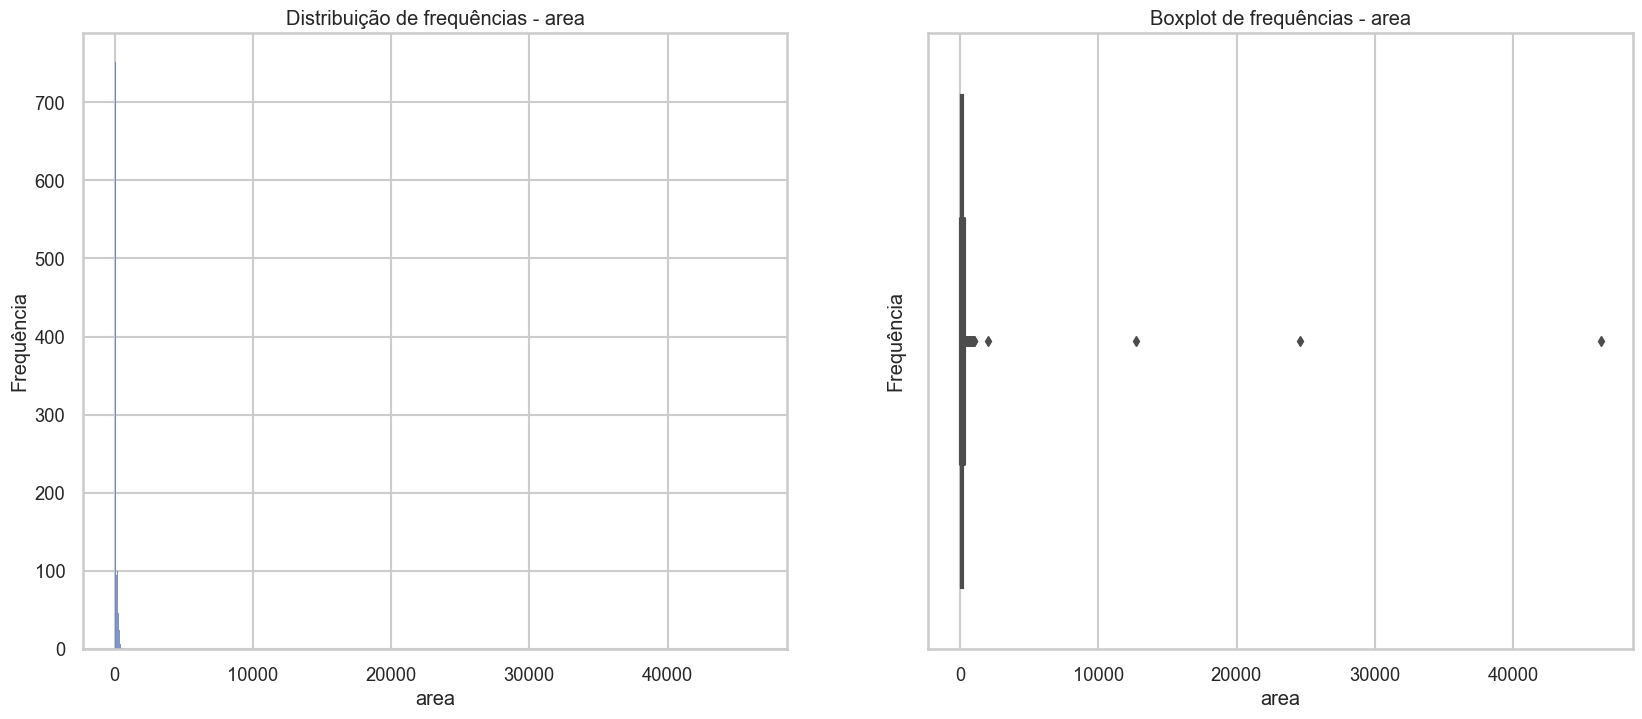

In [61]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='area')

Está comprovada a exitência de outilers neste atributo. Aliás, o intervalo entre os outliers e a massa de dados é tão grande, que sequer é possível concluir mais sobre os gráficos acima.

Conforme já destacado, o valor máximo registrado no atributo 'área' é absurdamente maior do que a média ou mediana, inclusive, levantando-se a suspeita de que se trata de um erro no registro dos dados, especialmente porque os dados foram obtidos com o uso de crowler.

Como medida:
  - eliminaremos os valores acima de 10000
  - substituiremos os demais outliers pela mediana ou média

Faremos iddo ao fim desta estapa (analise univariada), com os demais atributos que necessitarem de tratamento, e retomares a análise novamente.

Observemos o próximo atributo.

In [62]:
# Analisando estatísticas iniciais - 'hoa_'

pd.DataFrame(summary.loc['hoa_', ])

,hoa_
count,8.231000e+03
mean,1.484767e+03
std,1.775540e+04
min,0.000000e+00
25%,4.150000e+02
50%,7.500000e+02
75%,1.512500e+03
max,1.117000e+06
unique_values,1.644000e+03


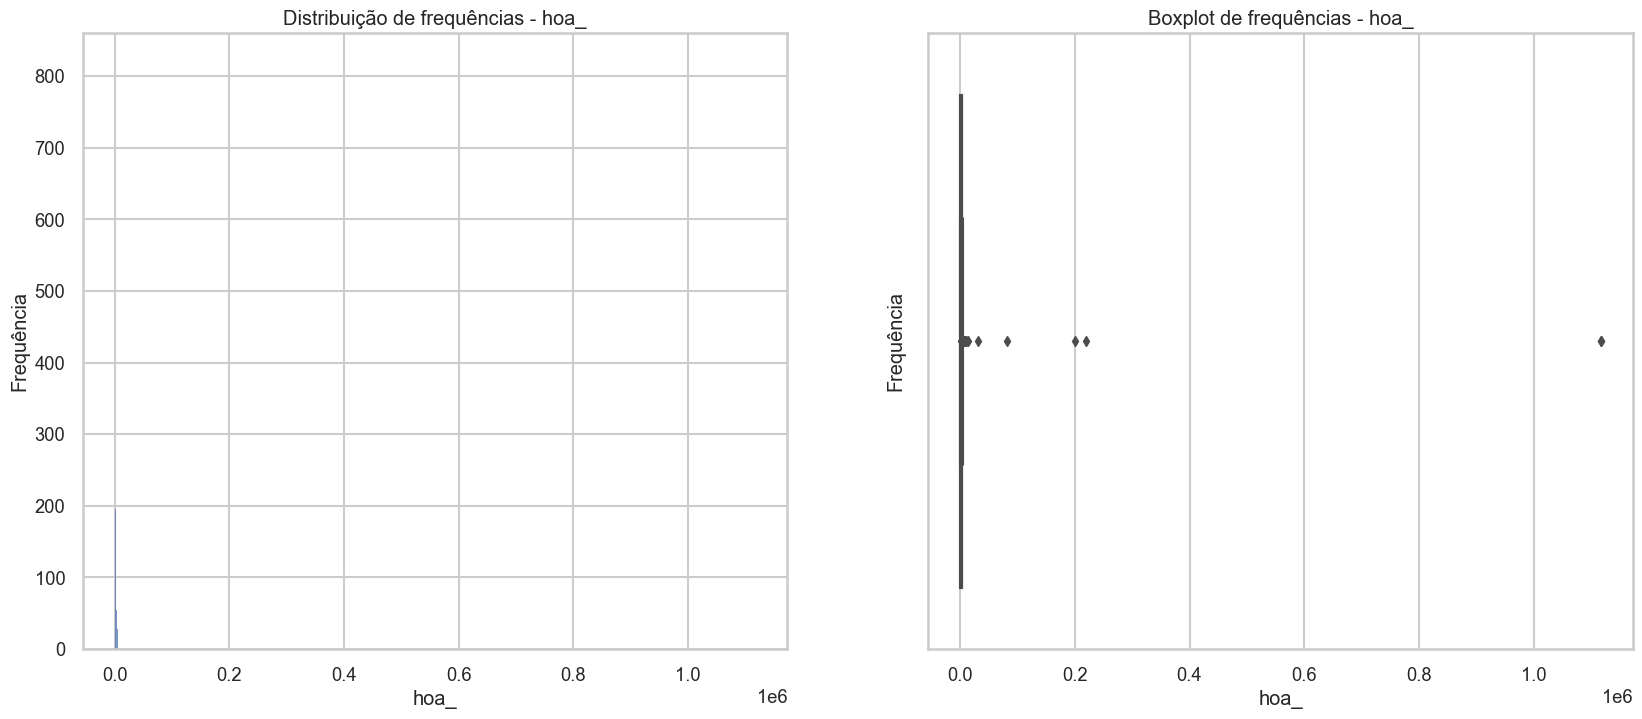

In [63]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='hoa_')

In [64]:
# Analisando estatísticas iniciais - 'rent_amount_'

pd.DataFrame(summary.loc['rent_amount_', ])

,rent_amount_
count,8231.000000
mean,3582.276394
std,3138.226949
min,460.000000
25%,1500.000000
50%,2500.000000
75%,4405.000000
max,24000.000000
unique_values,1052.000000


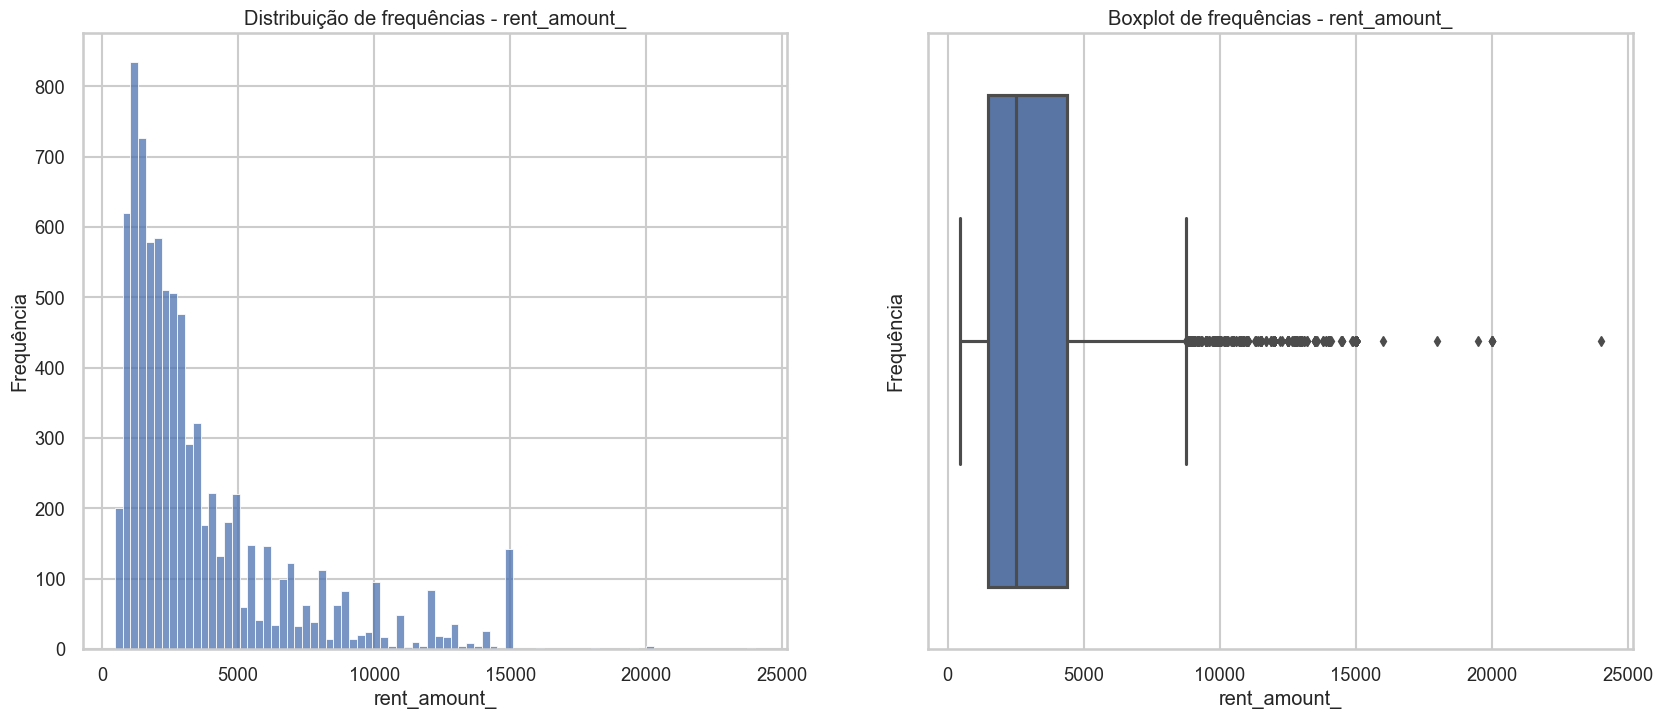

In [65]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='rent_amount_')

In [66]:
# Analisando estatísticas iniciais - 'property_tax_'

pd.DataFrame(summary.loc['property_tax_', ])

,property_tax_
count,8231.000000
mean,344.738063
std,3512.011622
min,0.000000
25%,36.000000
50%,112.000000
75%,332.000000
max,313700.000000
unique_values,1077.000000


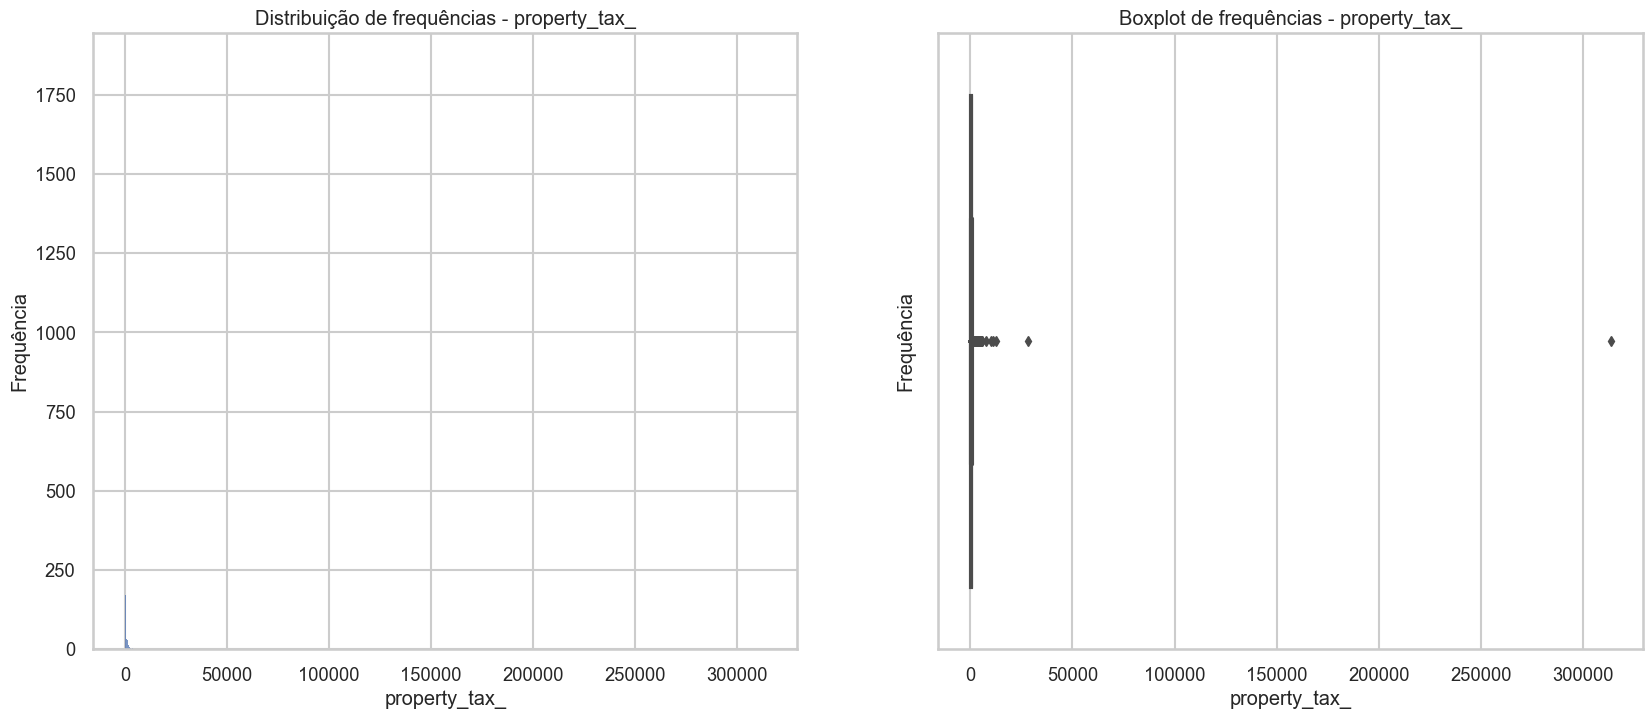

In [67]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='property_tax_')

In [68]:
# Analisando estatísticas iniciais - 'fire_insurance_'

pd.DataFrame(summary.loc['fire_insurance_', ])

,fire_insurance_
count,8231.000000
mean,46.455352
std,40.152370
min,3.000000
25%,20.000000
50%,32.000000
75%,58.000000
max,305.000000
unique_values,188.000000


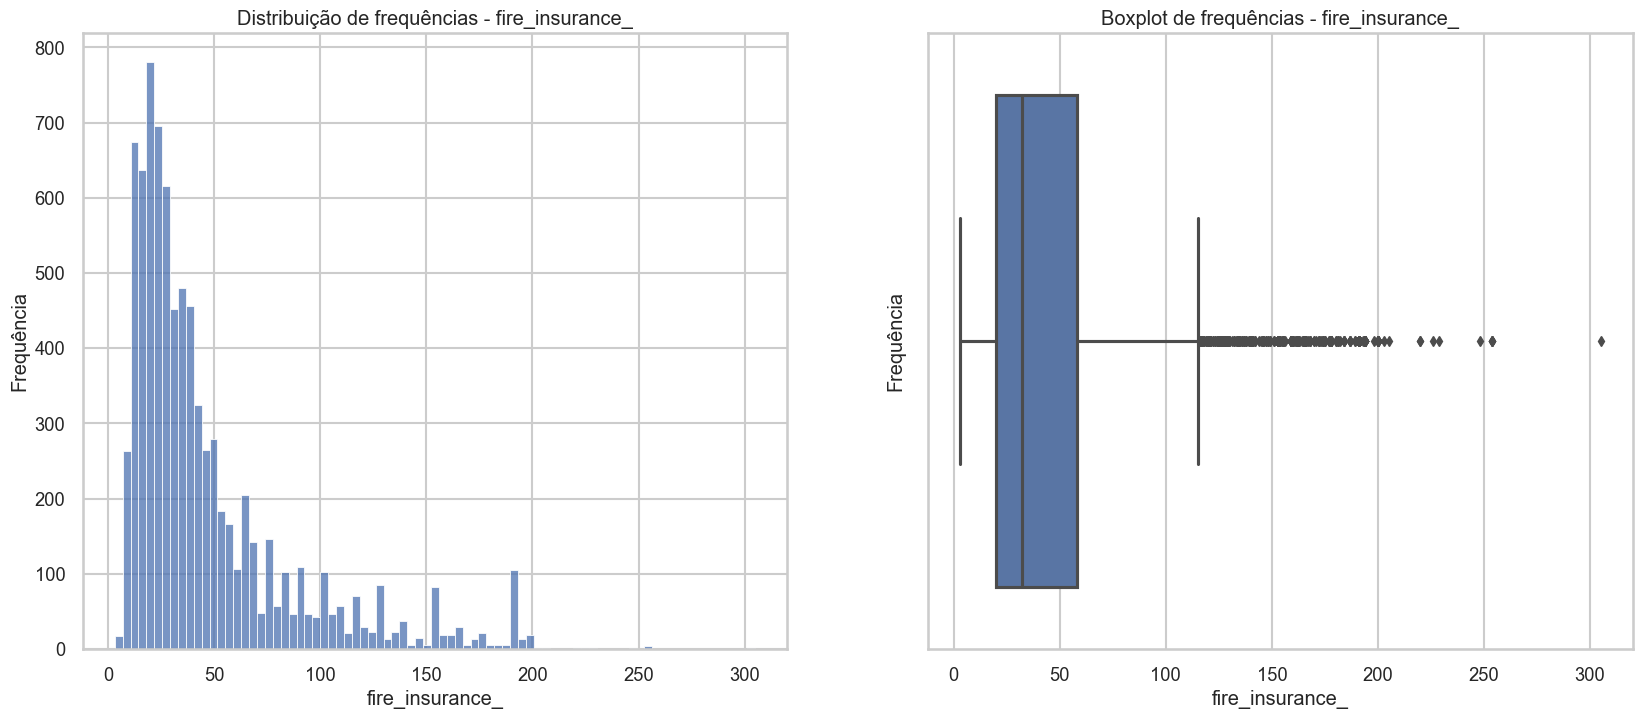

In [69]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='fire_insurance_')

In [70]:
# Analisando estatísticas iniciais - 'total_'

pd.DataFrame(summary.loc['total_', ])

,total_
count,8.231000e+03
mean,5.458473e+03
std,1.861053e+04
min,5.070000e+02
25%,2.079000e+03
50%,3.456000e+03
75%,6.394000e+03
max,1.120000e+06
unique_values,4.917000e+03


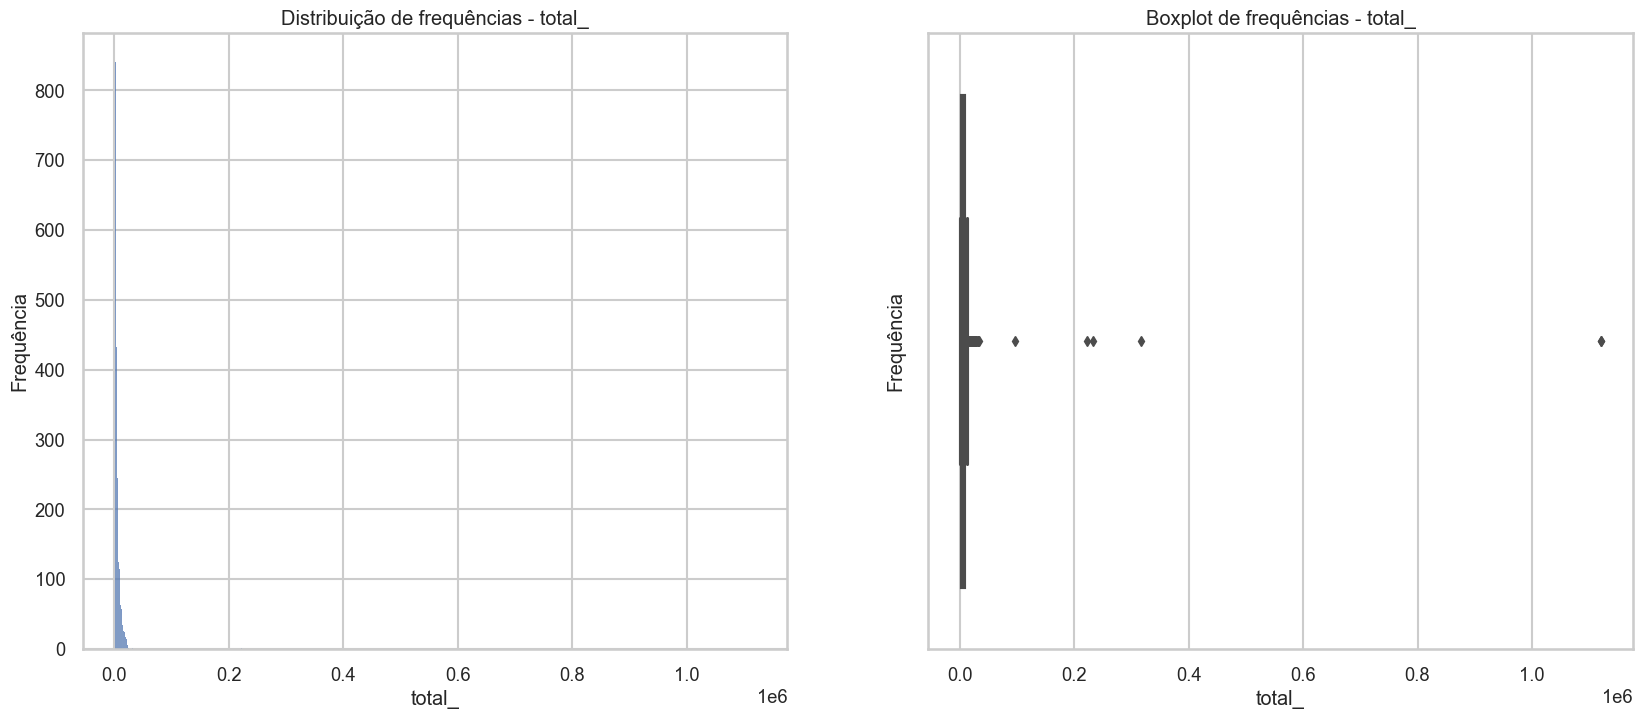

In [71]:
# Visualizando distribuição dos dados

analise_1.hist_boxplot(coluna='total_')

Aparentemente, todas as variáveis possuem os mesmos outliers. Isso ocorre pelo provável fato de estarem relacionadas.

Vamos observar se os dados mantém o mesmo comportamente em relação às medidas centrais, bem como à frequência da distribuição, eliminando-se os outliers.

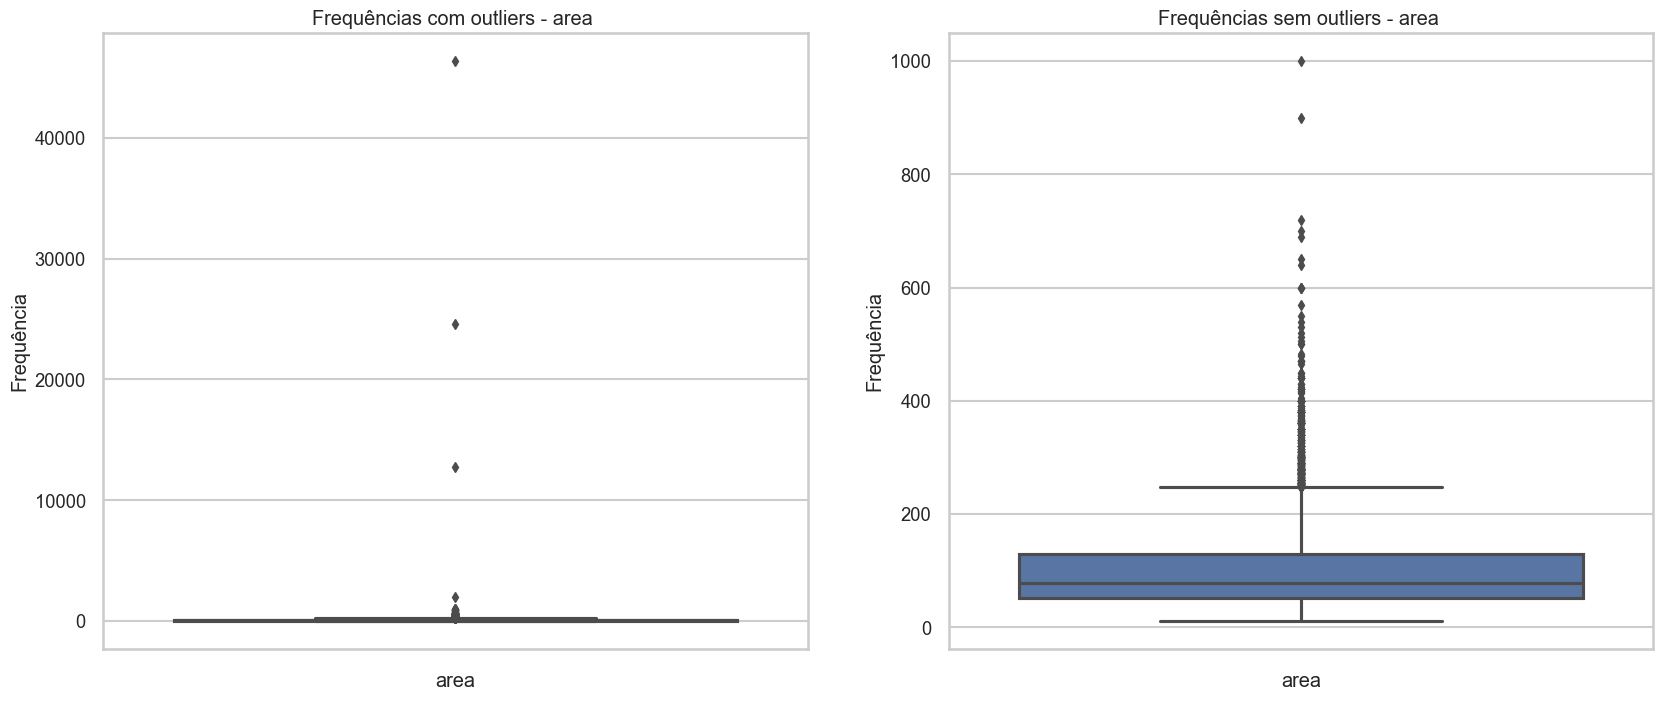

In [72]:
# Variável 'area'


analise_1.outliers_in_out(coluna = 'area', hist_or_boxplot='boxplot')


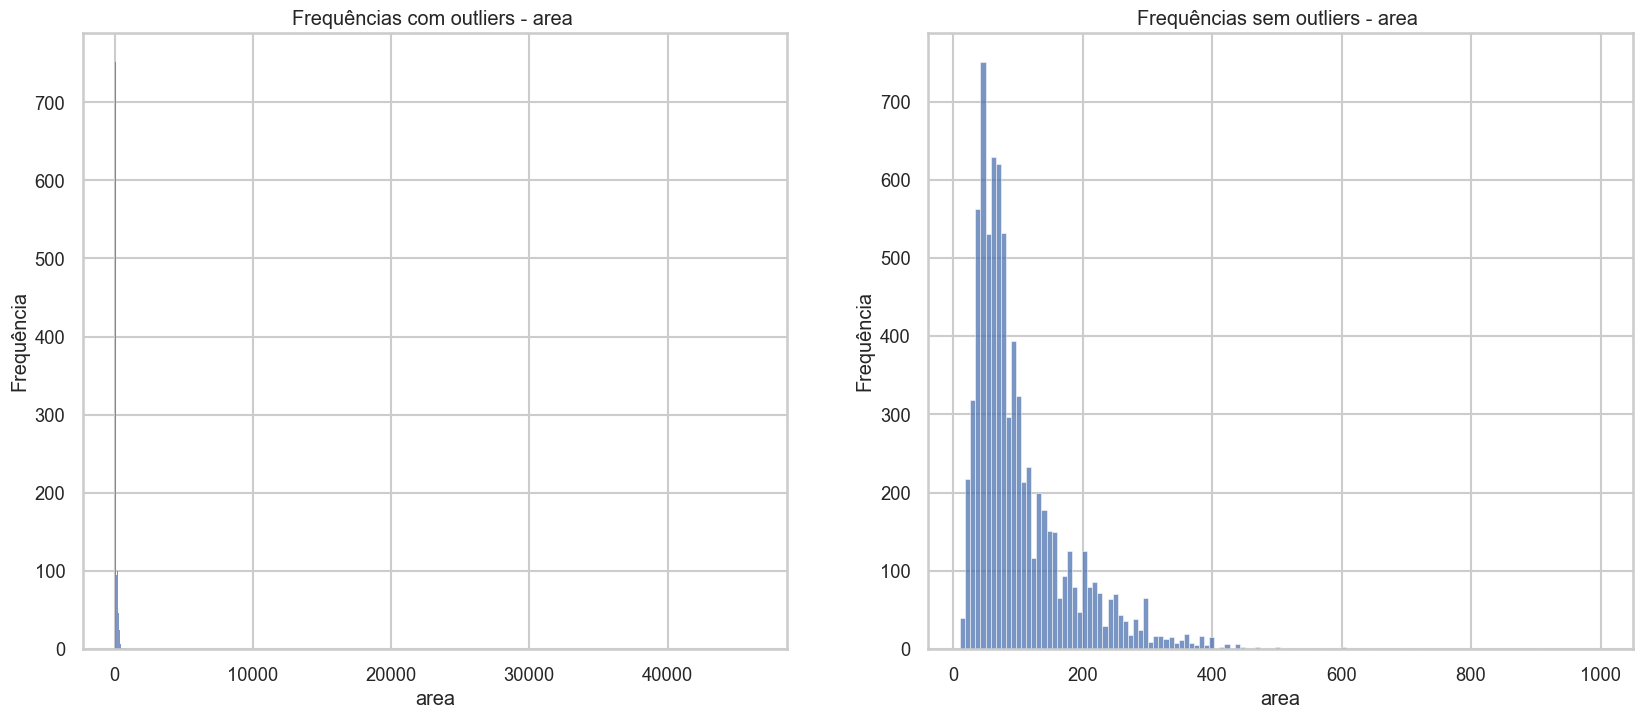

In [73]:
# Variável 'area'


analise_1.outliers_in_out(coluna = 'area', hist_or_boxplot='hist')

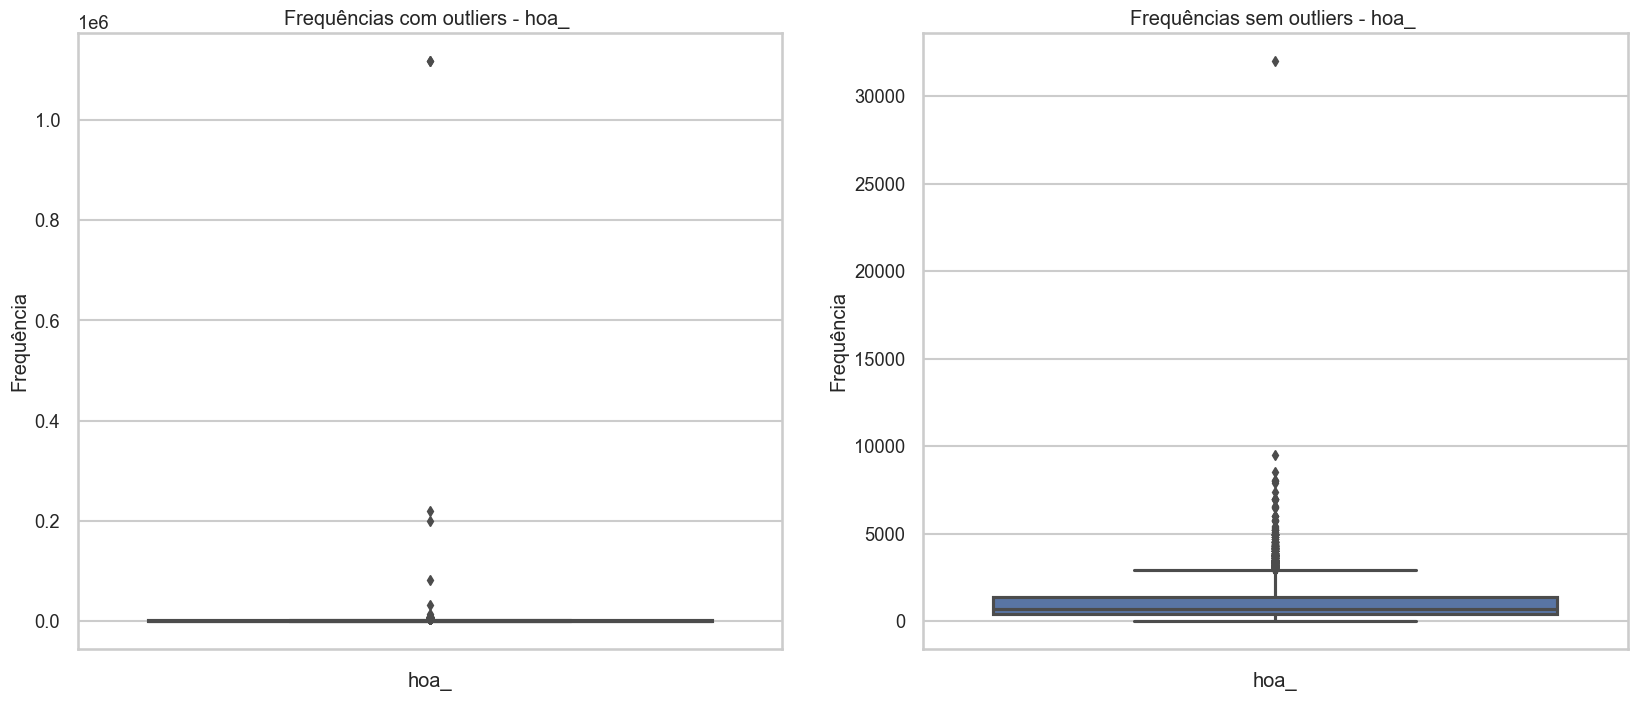

In [74]:
# Variável 'hoa_'


analise_1.outliers_in_out(coluna = 'hoa_', hist_or_boxplot='boxplot')

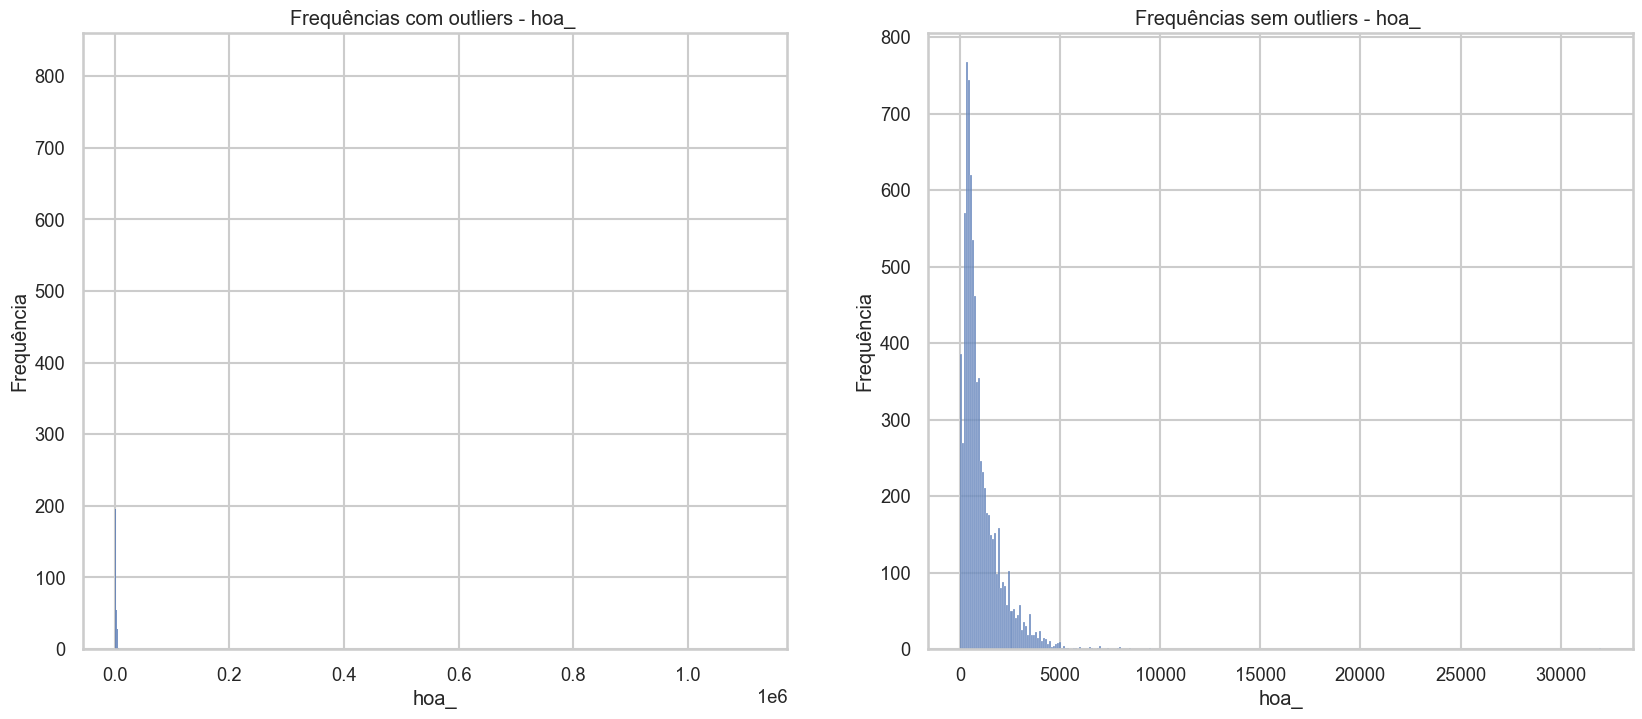

In [75]:
# Variável 'hoa_'


analise_1.outliers_in_out(coluna = 'hoa_', hist_or_boxplot='hist')

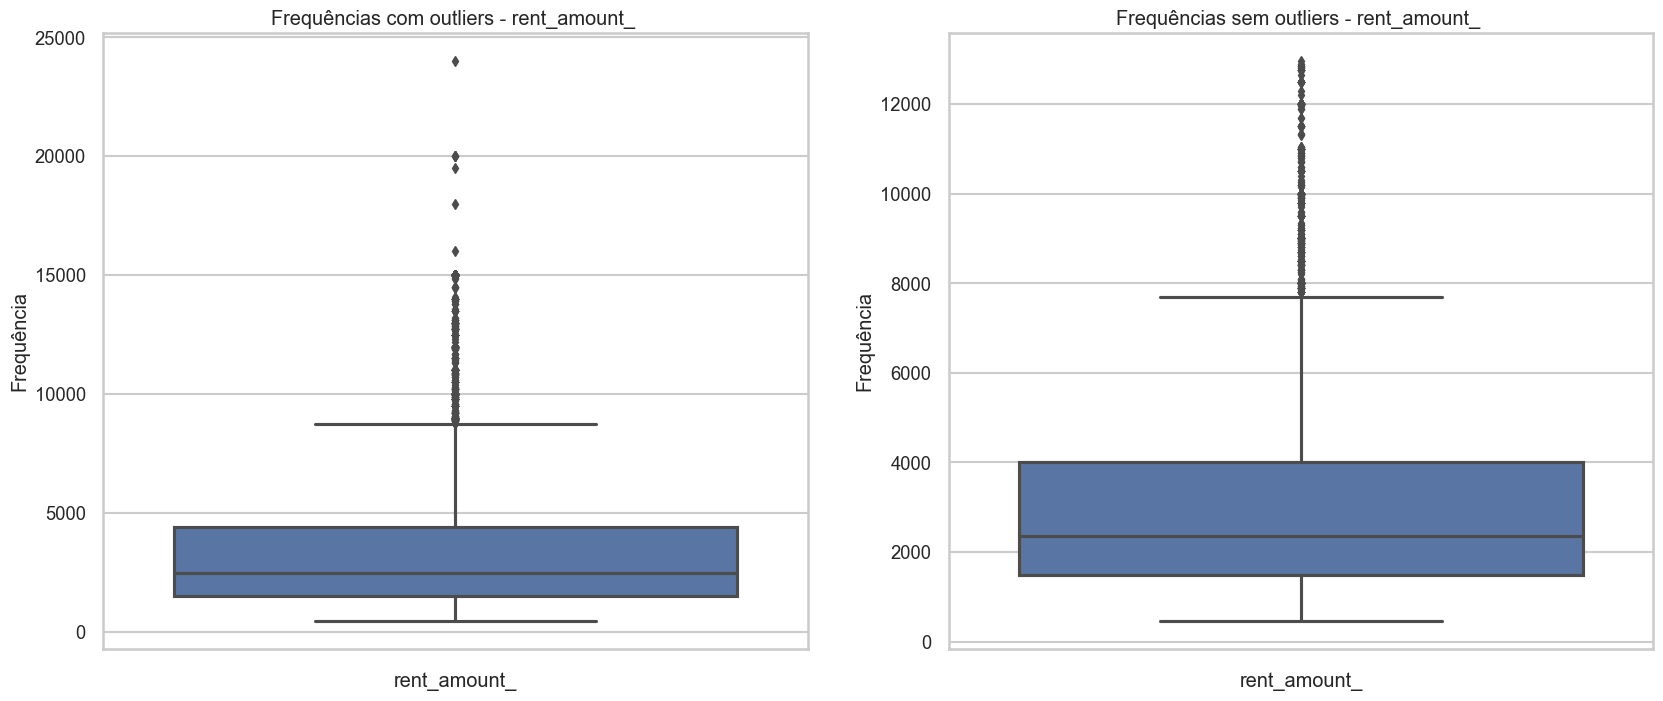

In [76]:
# Variável 'rent_amount_'


analise_1.outliers_in_out(coluna = 'rent_amount_', hist_or_boxplot='boxplot')

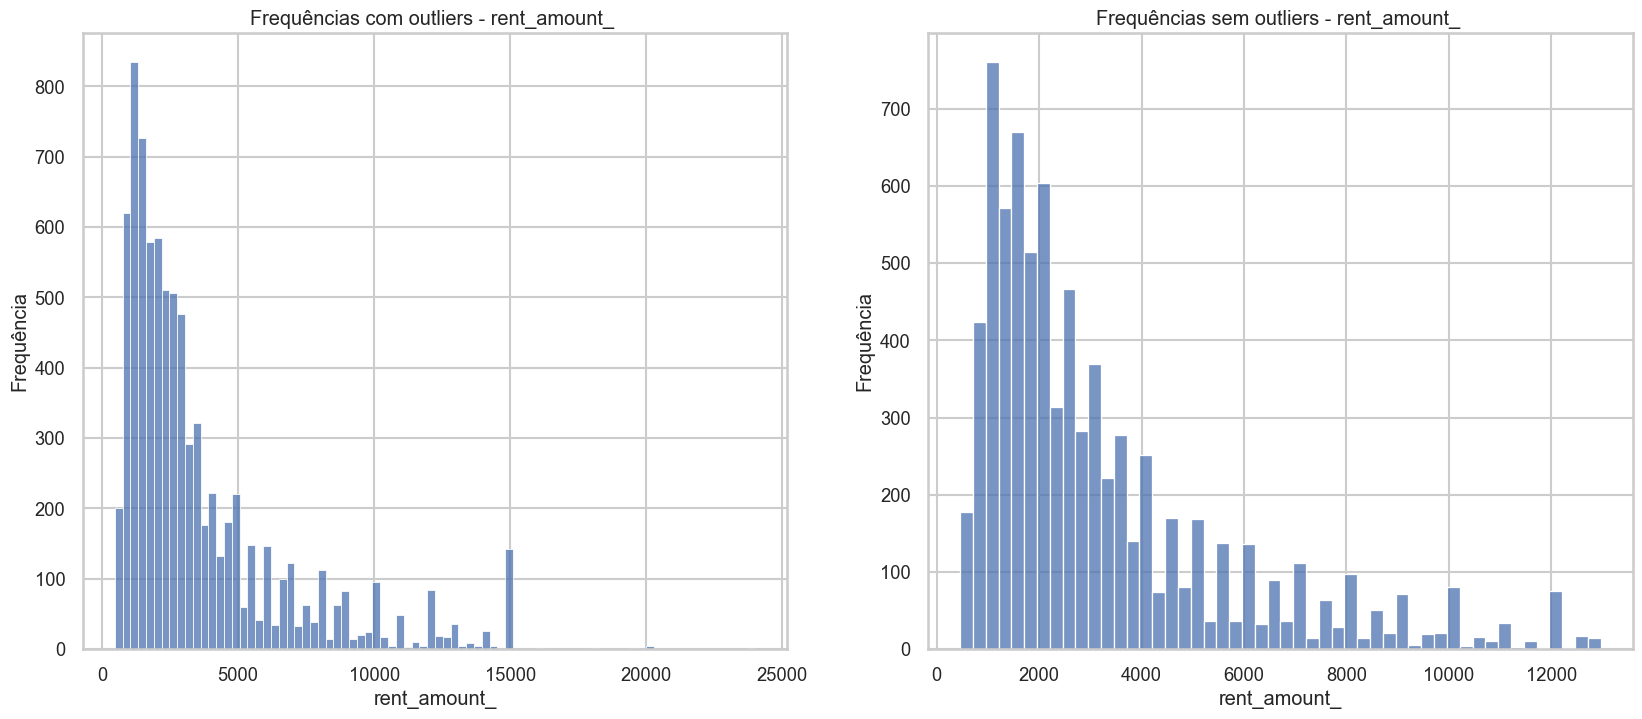

In [77]:
# Variável 'rent_amount_'


analise_1.outliers_in_out(coluna = 'rent_amount_', hist_or_boxplot='hist')

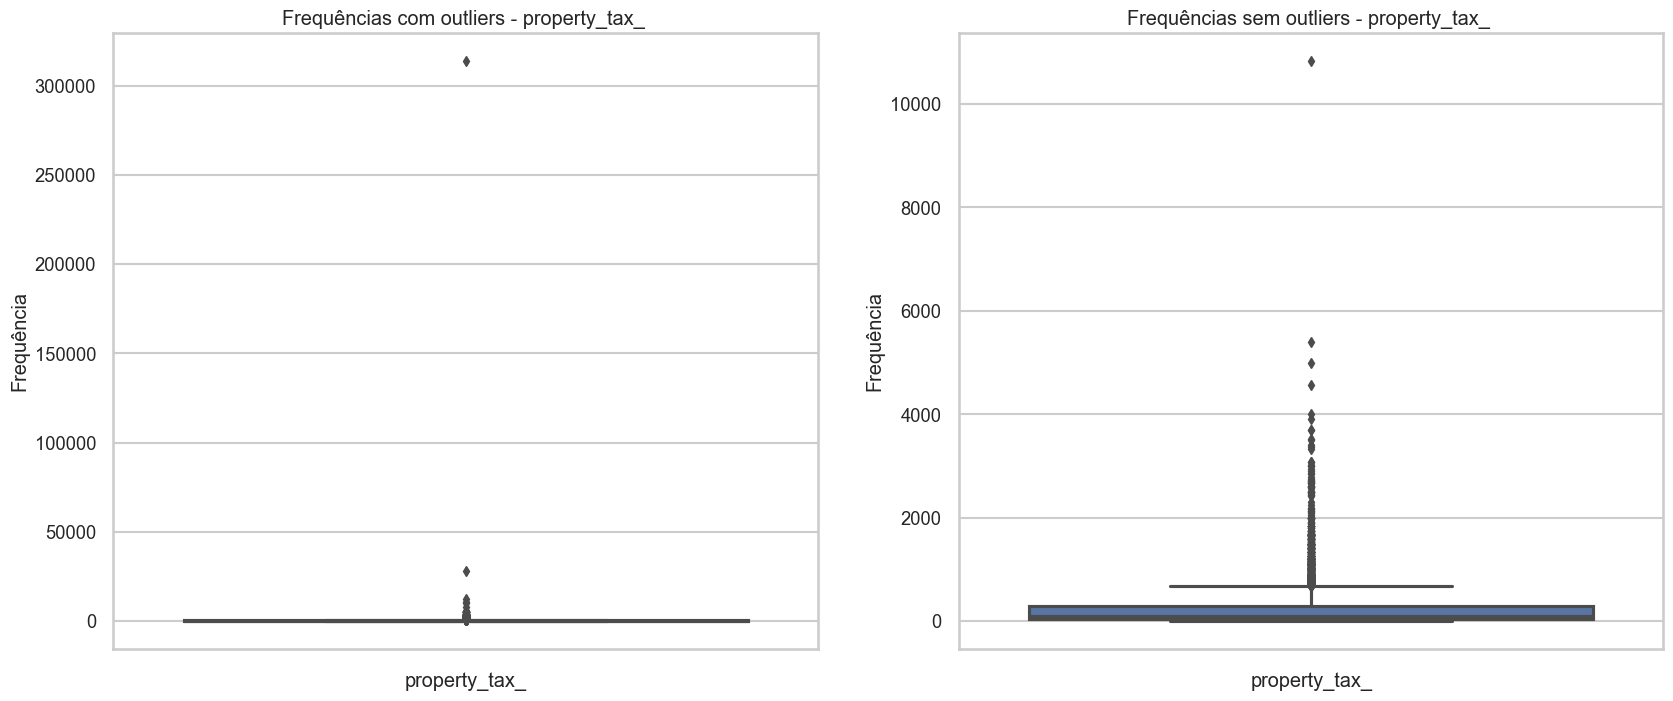

In [78]:
# Variável 'property_tax_'


analise_1.outliers_in_out(coluna = 'property_tax_', hist_or_boxplot='boxplot')

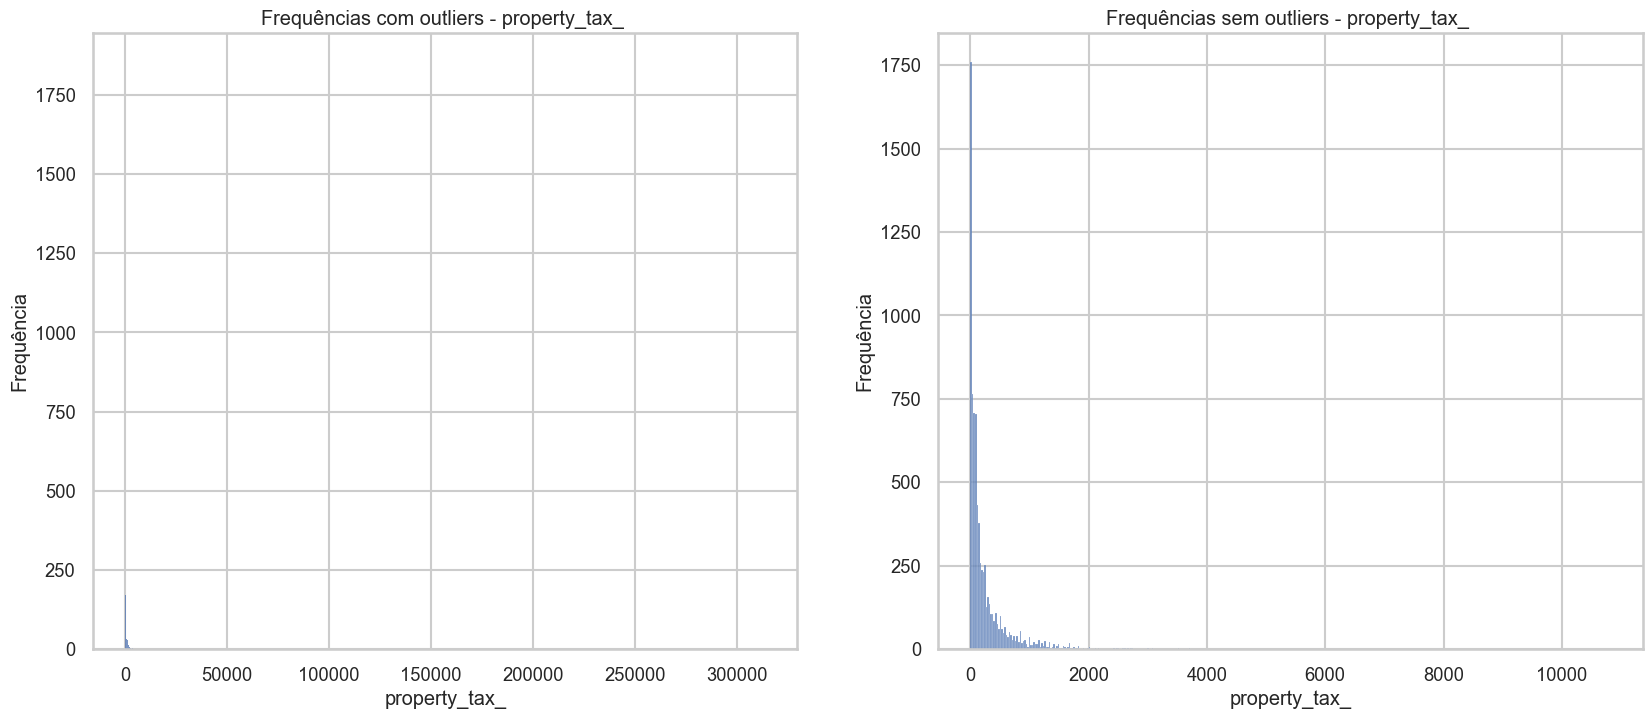

In [79]:
# Variável 'rent_aproperty_tax_mount_'


analise_1.outliers_in_out(coluna = 'property_tax_', hist_or_boxplot='hist')

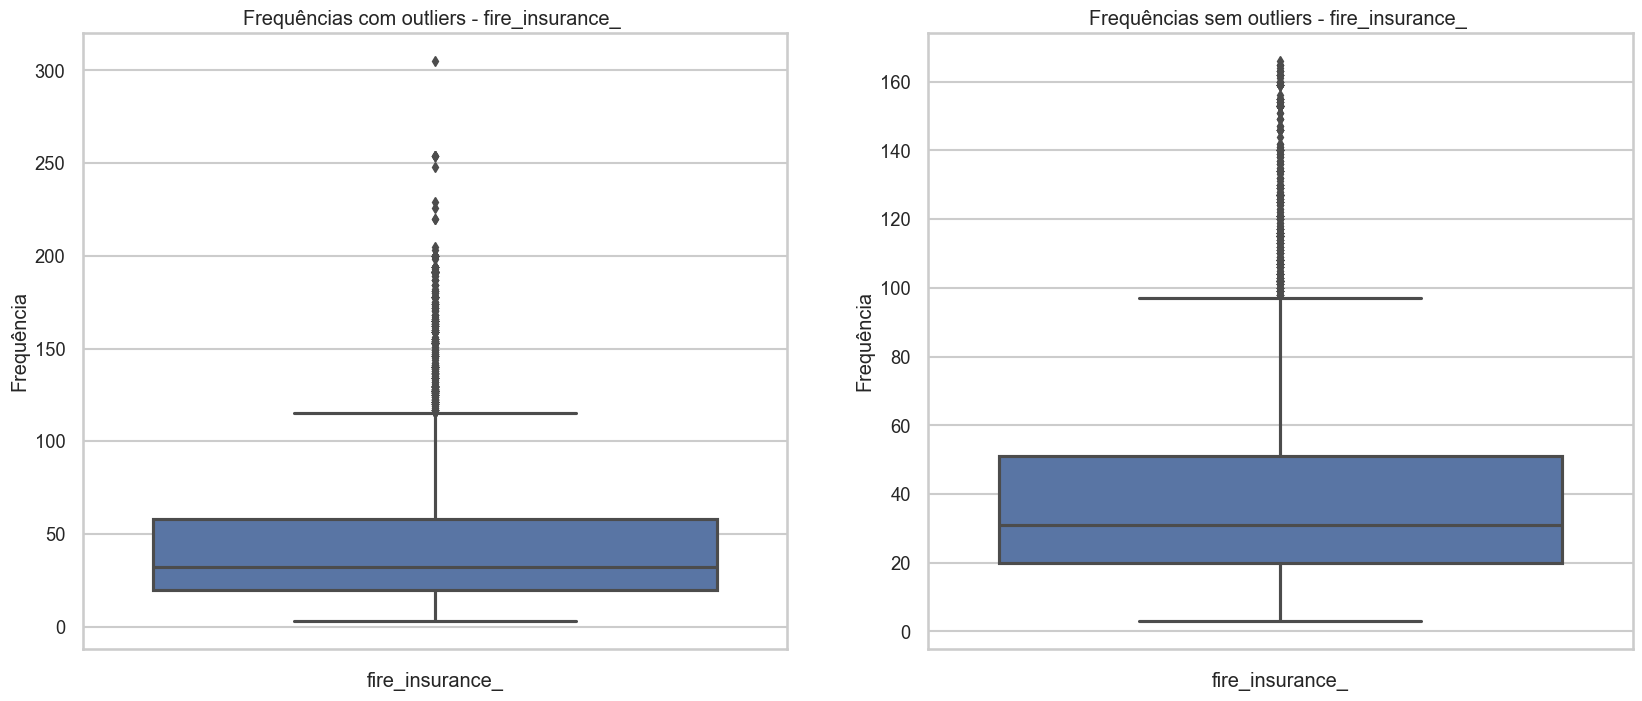

In [80]:
# Variável 'fire_insurance_'


analise_1.outliers_in_out(coluna = 'fire_insurance_', hist_or_boxplot='boxplot')

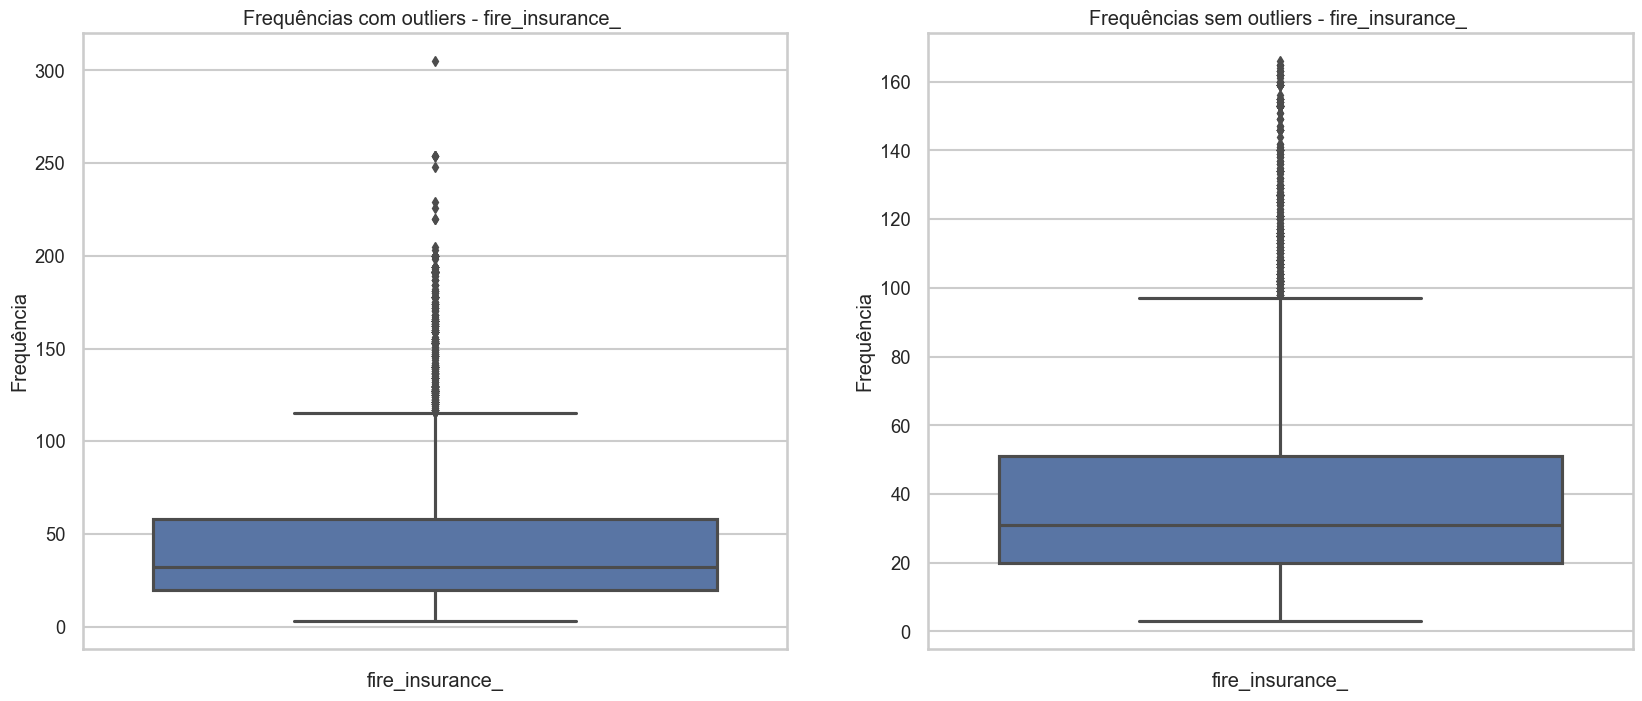

In [81]:
# Variável 'fire_insurance_'


analise_1.outliers_in_out(coluna = 'fire_insurance_', hist_or_boxplot='boxplot')

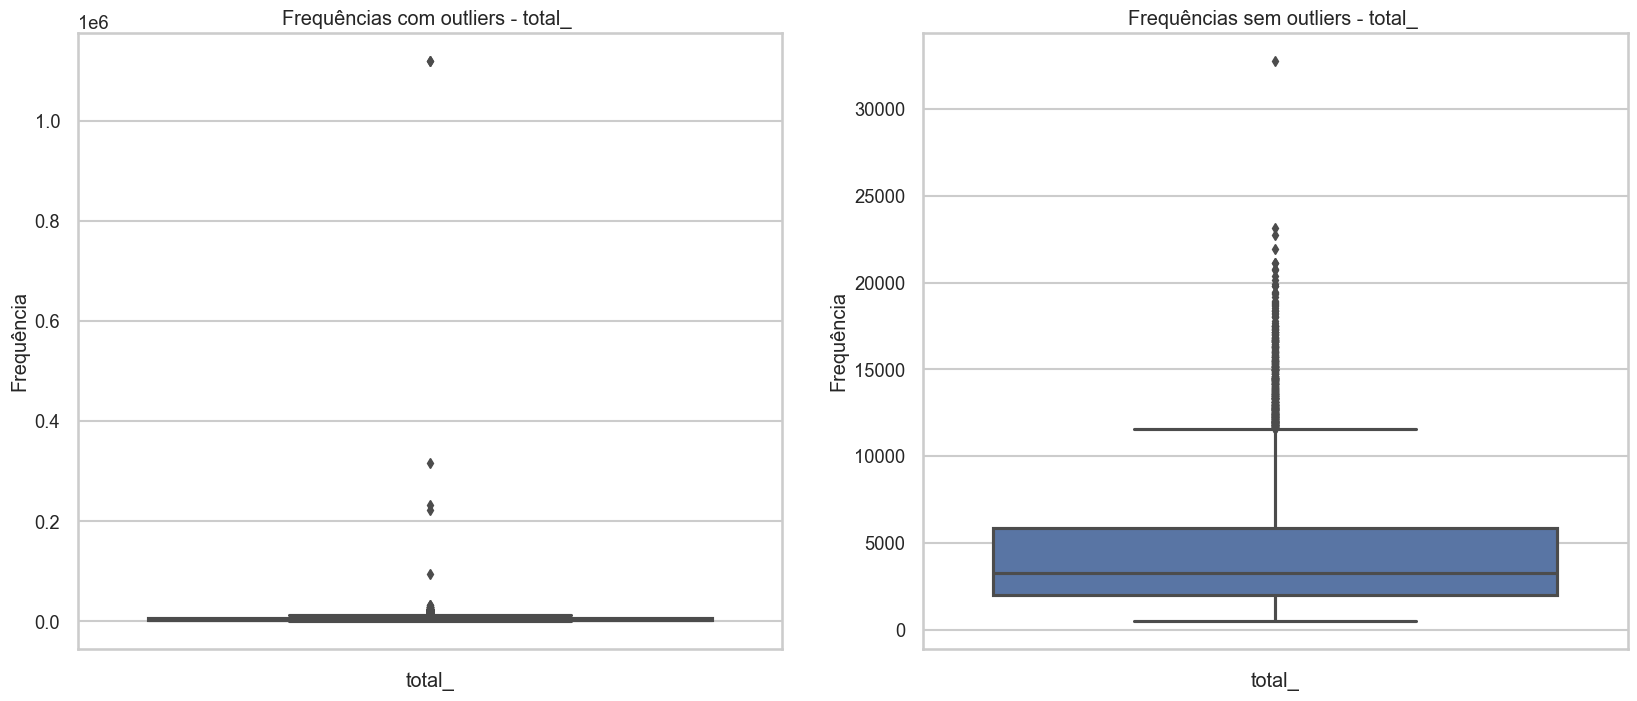

In [82]:
# Variável 'total_'


analise_1.outliers_in_out(coluna = 'total_', hist_or_boxplot='boxplot')

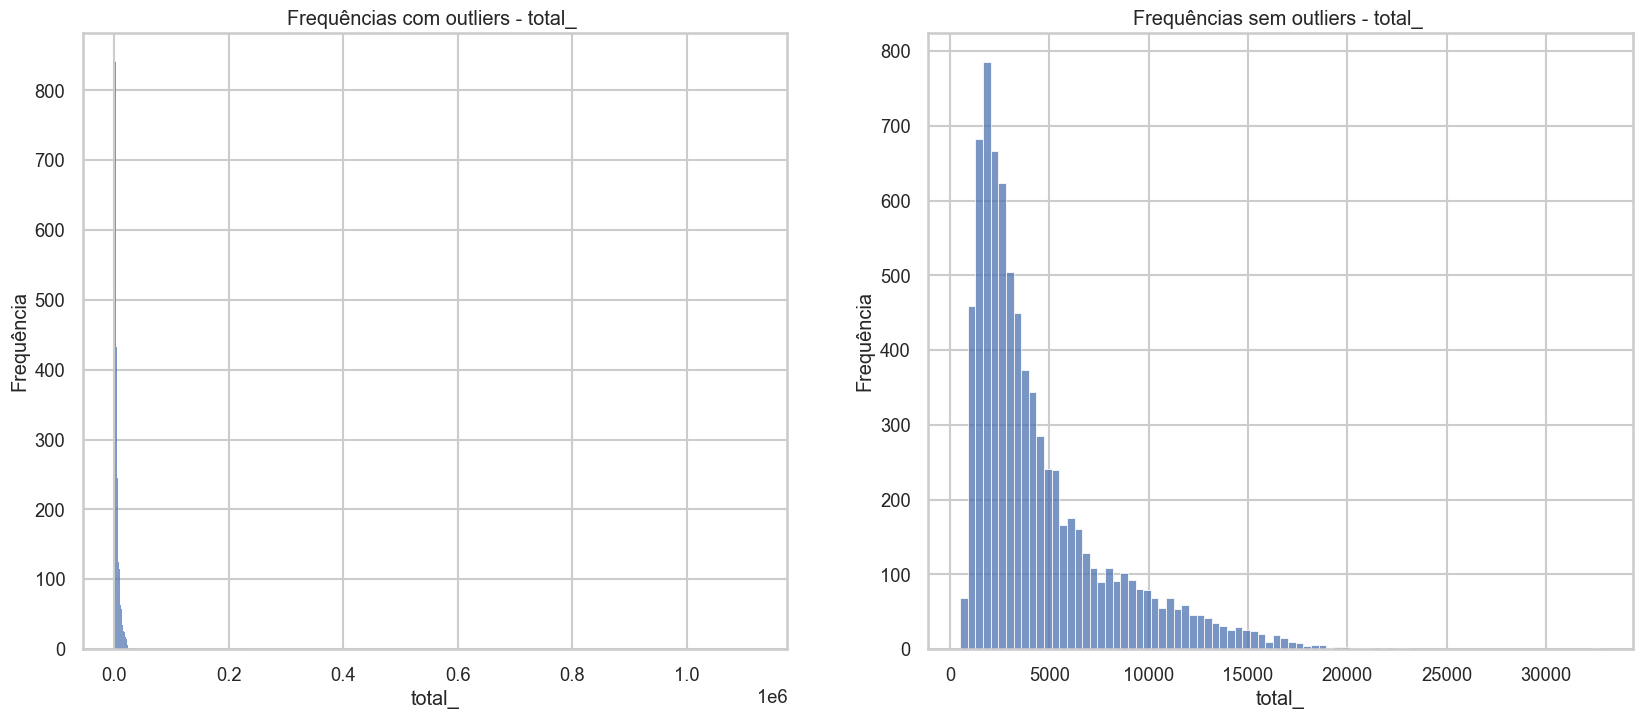

In [83]:
# Variável 'total_'


analise_1.outliers_in_out(coluna = 'total_', hist_or_boxplot='hist')

Percebe-se que após a eliminação dos outliers (valores à margem de 3 desvios padrão), a visualização dos dados melhora, e concluir que todas as variáveis numéricas contínuas possuem assimetia à ____, novamente, porque devem estar relacionadas.

Desta forma, como medida imediata, vamos utilizar o conjunto de dados sem os outliers, aplicando o atributo 'dataframe_out', resultado de método próprio aplicado ao conjunto de dados instânciado.

In [84]:
# Reobservando medida descritivas do dataset, com outliers descartados
analise_1.dataframe_out.describe().T.loc[['area', 'hoa_', 'rent_amount_', 'property_tax_', 'fire_insurance_', 'total_'], ]

,count,mean,std,min,25%,50%,75%,max
area,7827.0,104.279417,78.661171,11.0,52.0,78.0,130.0,1000.0
hoa_,7827.0,1050.172224,1023.508062,0.0,400.0,710.0,1400.0,32000.0
rent_amount_,7827.0,3196.012521,2484.363032,460.0,1490.0,2362.0,4000.0,12960.0
property_tax_,7827.0,248.909672,411.311685,0.0,34.0,101.0,292.0,10830.0
fire_insurance_,7827.0,41.509646,31.738111,3.0,20.0,31.0,51.0,166.0
total_,7827.0,4536.809250,3539.091076,507.0,2026.0,3302.0,5848.0,32750.0


A eliminação de outliers se mostrou parcialmente eficaz. Isto porque, ainda se verifica a existência de outliers nos dados, certamente motivada pela grande variabilidada, representada pela média e seus respevtivo desvio padrão.

Contudo, no momento, não tomaremos nenhume medida em relação a estes outliers. Observemos se existe algum padrão que permita melhor visualização, sem mais perda de informação (observe que o dataset já sofrou significativa redução).

## **4. Análise bi-variada**

Vamos observar inicialmente, como a variável de interesse (fire_insurance_) se comportar quando compara com outras.


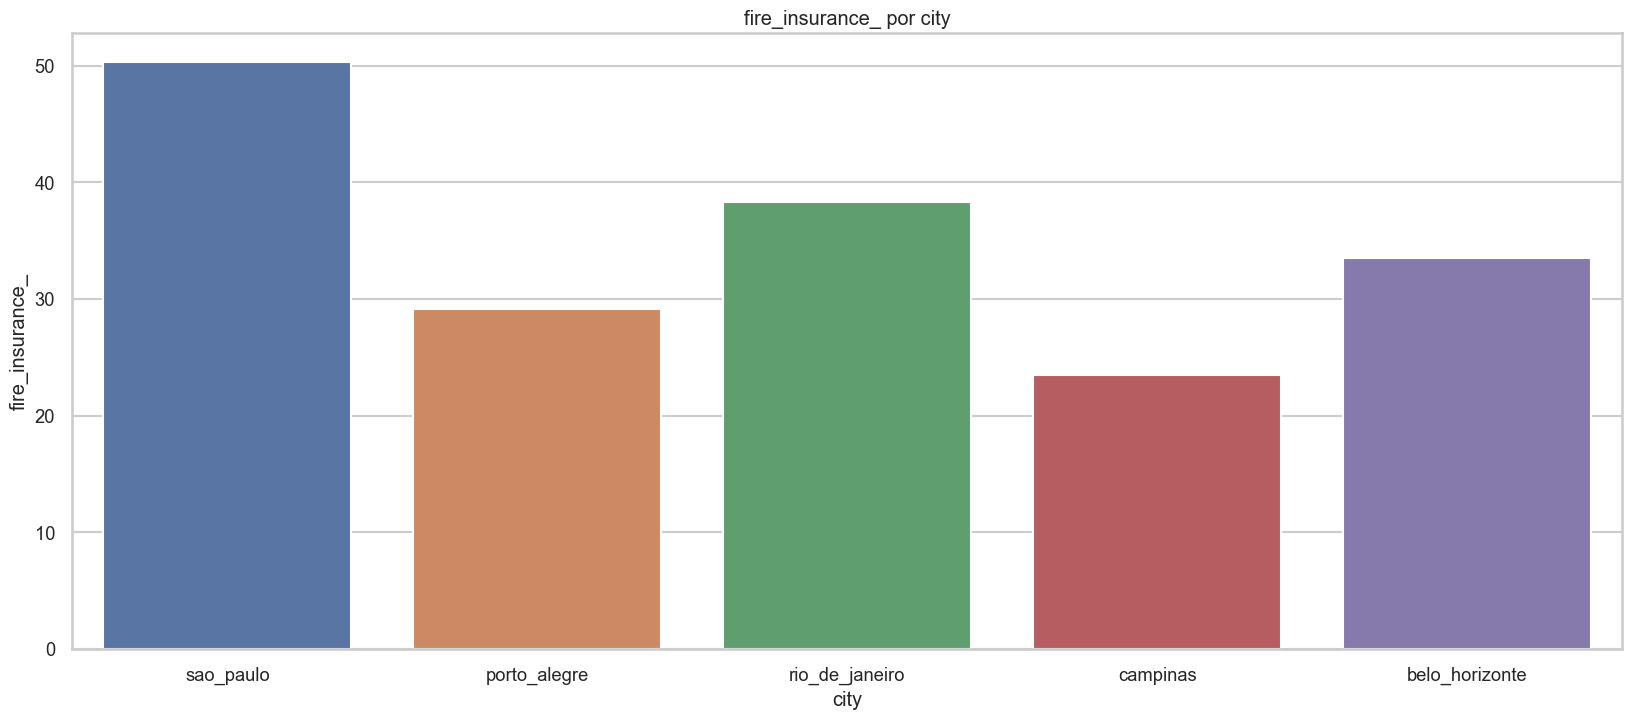

In [85]:
analise_1.bar_graphic(atributo = 'fire_insurance_', categoria = 'city')

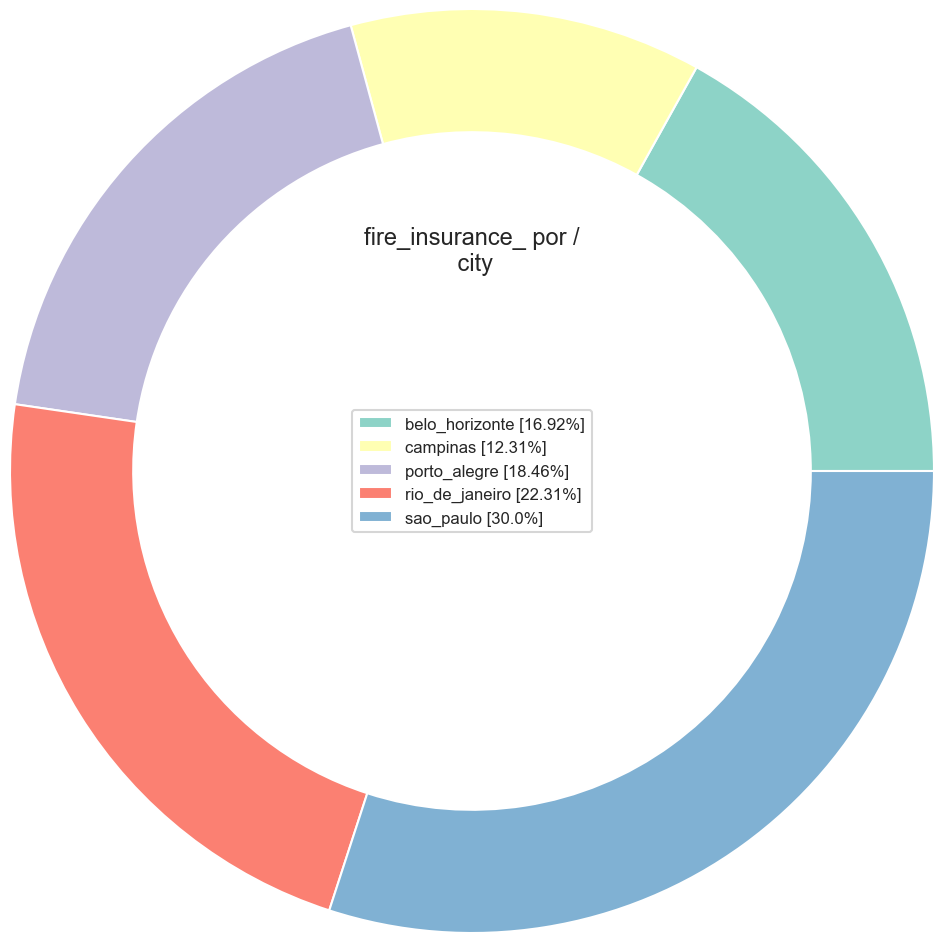

In [86]:
# Em números relativos, a mediana do valor do seguro nas Cidades de São Paulo e Rio de Janeiro de destacam das demais

analise_1.pie_chart(atributo = 'fire_insurance_', group = 'city', summarise='median')

In [87]:
analise_1.dataframe_out.groupby('city').count()

,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa_,rent_amount_,property_tax_,fire_insurance_,total_
city,,,,,,,,,,,,
belo_horizonte,867,867,867,867,867,867,867,867,867,867,867,867
campinas,637,637,637,637,637,637,637,637,637,637,637,637
porto_alegre,989,989,989,989,989,989,989,989,989,989,989,989
rio_de_janeiro,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362
sao_paulo,3972,3972,3972,3972,3972,3972,3972,3972,3972,3972,3972,3972


In [88]:
analise_1.pie_chart()

TypeError: pie_chart() missing 2 required positional arguments: 'atributo' and 'group'

In [ ]:
analise_1.outliers_in_out(coluna = 'fire_insurance_', hist_or_boxplot='boxplot', categoria='city')

In [ ]:
# Mediana da área por cidade
analise_1.pie_chart(atributo = 'area', group = 'city', summarise='median')

In [ ]:
analise_1.outliers_in_out(coluna = 'area', hist_or_boxplot='boxplot', categoria='city')

In [ ]:
# Mediana do valor do aluguel por cidade

analise_1.pie_chart(atributo = 'rent_amount_', group = 'city', summarise='median')

In [ ]:
analise_1.outliers_in_out(coluna = 'rent_amount_', hist_or_boxplot='boxplot', categoria='city')

O gráfico de rosca demonstra que as três variáveis (area, rent_amount_, e fire_insurance_) possuem maiores valores nas cidade de São Paulo e Rio de Janeiro. Iremos investigar uma relação entre esses atributos, bem como, a possível formação de clusters.


In [ ]:
# Verificando a existência de 

analise_1.pair_plots(atributos=['rent_amount_', 'fire_insurance_', 'area', 'property_tax_', 'total_'], )

In [ ]:
# Matriz de correlação - coeficiente utilizado é o mais indicado quando as variáveis não possuem distribuição normal

analise_1.cor_matrix(atributos=['rent_amount_', 'fire_insurance_', 'area', 'property_tax_', 'total_'], coeficiente='spearman')

Inicialmente, vamos observar a axistência de alta correlação entre vários atributos. Manter variáveis com alta correlação no modelo traz problemas como o overfiting, e compromete a própria precisão do resultado, pois esteremos enchendo-o de informação redundante. No presente caso, a alta correlação é explicada pelo fato de que alguns atributos usam outro - ou são usados - para composição do valor final (total_).

Outra circunstância é relevante, não podemos usar o atributo 'rent_amount-' para modelar a previsão a ser realizada, pois não permitirá resolver o problema de neógicio proposto pela seguradora destinatária desta análise. Observe, A seguradora ___ quer oferecer serviços antes dos concorrentes, se esperar o o negócio entre locador e locatário ser realizado, pode ser tarde demais. Por isso, faz-se necessário encontrar outra forma de calcular o seguro.

Assim eliminarmos o atributo 'rent_amount_'. Também eliminaremos 'total_', e 'propert_tax_'

E aqui está nossa vantagem, apenas com a medida do imóvel, será possível estabelecer o valor provável do seguro praticado pelos concorrentes, conforme este dataset, e, poder-se-á realizar uma proposta melhor do que ofereceriam, antes mesmo de oferecerem!

A correlação entre a área do imóvel, e o seguro contra incêndio (variável a ser prevista) é de 0.63, e, pode ser verificada visualmente.



In [ ]:
# Correlação entre 'aarea' e 'fire_insurance_'

analise_1.scatterplots(x = 'area', y = 'fire_insurance_')

Verificada a relação linear positiva (média) entre as variáveis 'area' e fire_insurance_.

## **5. Conclusão**


Verificada a relação linear positiva (média) entre as variáveis 'area' e fire_insurance_.



# **3. Machine learning**

Vamos aplicar inicialmente, um algoritmo de agrupamento (K-means), e, poderemos confirmar se as impressóes obtidas (na análise exploratória) de que haviam grupos distintos nos dados, são justificáveis.

Se forem, faremos um split da base para aplicar o modelo; se não, seguiremos para a aplicação do algoritmo de previsão com a base atual.


In [ ]:
# Verificando shape dos dados

analise_1.dataframe_out.info()

In [ ]:
analise_1.dataframe_out.describe().T

Inicialmente, vamos submeter toda a base de dados (com os atributos categóricos codificado), e ver se podemos encontrar um padrão de agrupamento nos dados.

## **Preparando dados para algoritmos**

In [17]:
# Instanciando atributo a ser previsto

analise_1.target = 'fire_insurance_'

In [18]:
# Aplicando one hot encoding às variáveis categóricas

analise_1.standardize()

In [19]:
# Visualizando dados padronizados e codificados - exceto a variável target

analise_1.standardized_df

,area,rooms,bathroom,parking_spaces,floors,hoa_,rent_amount_,property_tax_,fire_insurance_,total_,city_sao_paulo_code,city_porto_alegre_code,city_rio_de_janeiro_code,city_campinas_code,city_belo_horizonte_code,animal_acept_code,animal_not_acept_code,furniture_furnished_code,furniture_not_furnished_code
0,-0.435786,2,1,1,7,0.991519,0.041857,-0.092168,42.0,0.305500,1,0,0,0,0,1,0,1,0
1,2.742402,4,4,0,20,0.146387,0.710036,3.649520,63.0,0.970925,1,0,0,0,0,1,0,0,1
2,-0.308658,1,1,1,6,-0.049020,-0.159402,-0.605161,41.0,-0.196607,0,1,0,0,0,1,0,0,1
3,-0.677328,2,1,0,2,-0.762253,-0.838852,-0.551673,17.0,-0.880398,0,1,0,0,0,1,0,0,1
4,-1.007860,1,1,0,1,-1.026052,-0.964437,-0.544380,11.0,-1.045695,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,-0.079829,2,1,0,1,-0.478914,0.283367,-0.157811,51.0,0.044698,0,0,1,0,0,1,0,0,1
8225,-0.270520,3,2,2,11,-0.158447,1.740884,-0.067855,96.0,1.183691,1,0,0,0,0,1,0,0,1
8227,-0.524775,2,1,1,5,-0.633285,-0.691530,-0.546811,22.0,-0.737706,0,1,0,0,0,0,1,1,0
8229,-0.435786,3,3,0,8,-0.068560,1.128654,0.202013,78.0,0.806193,0,0,1,0,0,0,1,1,0


Todas as variáves foram convertidas para o tipo numérico, permitindo a aplicaçao do algotimo K-Means, inclusive representado com cariáveis categóricas.

Isto nos permitirá verificar se os indícios encontrados na fase exploratória dos dados (ex: médias sutilmente divergentes, em relação a cidades, desbalanceamento da amostragem, também em relação as cidades, etc).

## 1 - **Iniciando aplicação do modelo K-Means**

In [ ]:
# Iniciando aplicação do algoritmo
  # Verificando número ideal de clusters

analise_1.elbow_method()

In [ ]:
# Aplicando algoritmo K-Means

analise_1.k_means(clusters = 2)

In [ ]:
# Visualizando 'fire_insurance_' ~ 'area'

with sns.axes_style('whitegrid'):
    
    sns.histplot(data = analise_1.clustered_data[['area', 'cluster']],
            x = 'area', hue = 'cluster')

In [ ]:
# Visualizando 'fire_insurance_' ~ 'area'
  #cluster "0"

sns.scatterplot(data = analise_1.clustered_data, x='area', y = 'fire_insurance_', hue = 'cluster')


   Após aplicar o algoritmo de agrupamento à toda base de dados, confirmamos o que vimos nas análises uni e bi-variada:

    - os dados já estão bastante agrupados, de modo que não se justifica particioná-los para análise individual.

   Verificamos nas distribuições de frequências, bem como nos gráficos de pontos até agora visualizados, que não existe uma relação, em específico, que cause um padrão diferente do que estamos vendo; isso, no relacionamento entre os atributos que selecionamentos com base na análise de correlação realizada 'fire_insurance_' ~ 'area'.
   
   Assim sendo, não faremos nenhum particionamento nos dados, vamos dar seguimento à análise, bem como submetê-los ao modelo de machine learning na forma como estão.
       

## 2 - **Iniciando aplicação da regressão linear**

Submeteremos os dados ao modelo de regressão linear da seguinte forma:

           1 - Modelagem

           2 - Estimativas

           3 - Inferências

           4 - Predições

Assim, garantiremos que nosso modelo não receberá dados redundantes na entreda, bem como, poderemos previnir problemas de performaance e overfitting.

É necessário realizar todas as etapas acima descritas para garantir que o modelo será mais do que um número. Obsverve, se submetermos todos os atributos da base de dados ao algoritmo de regressão linear, certamente teremos um resultado quase perfeito; mas, não significa que irá realizar previsões como deveria.

A título de exemplo, abaixo, faz-se rapidamento o cálculo e obtem-se o coeficiente de determinação (R2).

In [20]:
#Separando bases - com todos os atributos

analise_1.bases()

In [21]:
# Aplicando regressão (sem preparação)

analise_1.linear_regression_skelearn()

In [22]:
# Obtendo o R2

analise_1.score

0.9935504960361947

Como dito, quase perfeito, o que é suficiente para levantar suspeitas!

Façamos do modo certo, portanto. Vamos calcular a regressão utilizando o pacote statsmodels, e analisar suas estatísticas de saída, antes de tomar uma decisão definitiva sobre o modelo ajustado.

### Modelagem (quais perguntas queremos responder)

Aqui, será revisto o problema de negócio a ser resolvido, e, levantaremos os atributos que possuem capacidade de responder a esta questão. Portanto, utilizaremos as primeiras impressões estatísticas, para definir o futuro do modelo deste modelo preditivo.

Nesta fase, também é possível verificar um dos pressupostos assumidos pela regressão linear: 

        * existência de relação linear entre as variáveis de interesse.
        
**Questões de negócio**

    1 - Com base no conjunto de dados apresentado, é possível determinar qual é a báse de cálculo do seguro incêndio (fire_insurance_)
    
    2 - É possível prever o valor a ser cobrado pelos concorrentes, de seguro incêndio, antes mesmo de ser defindo o valor do aluguel... (lembre-se de que a Seguradora S.A. quer chegar primeiro, e com a melhor proposta)
    

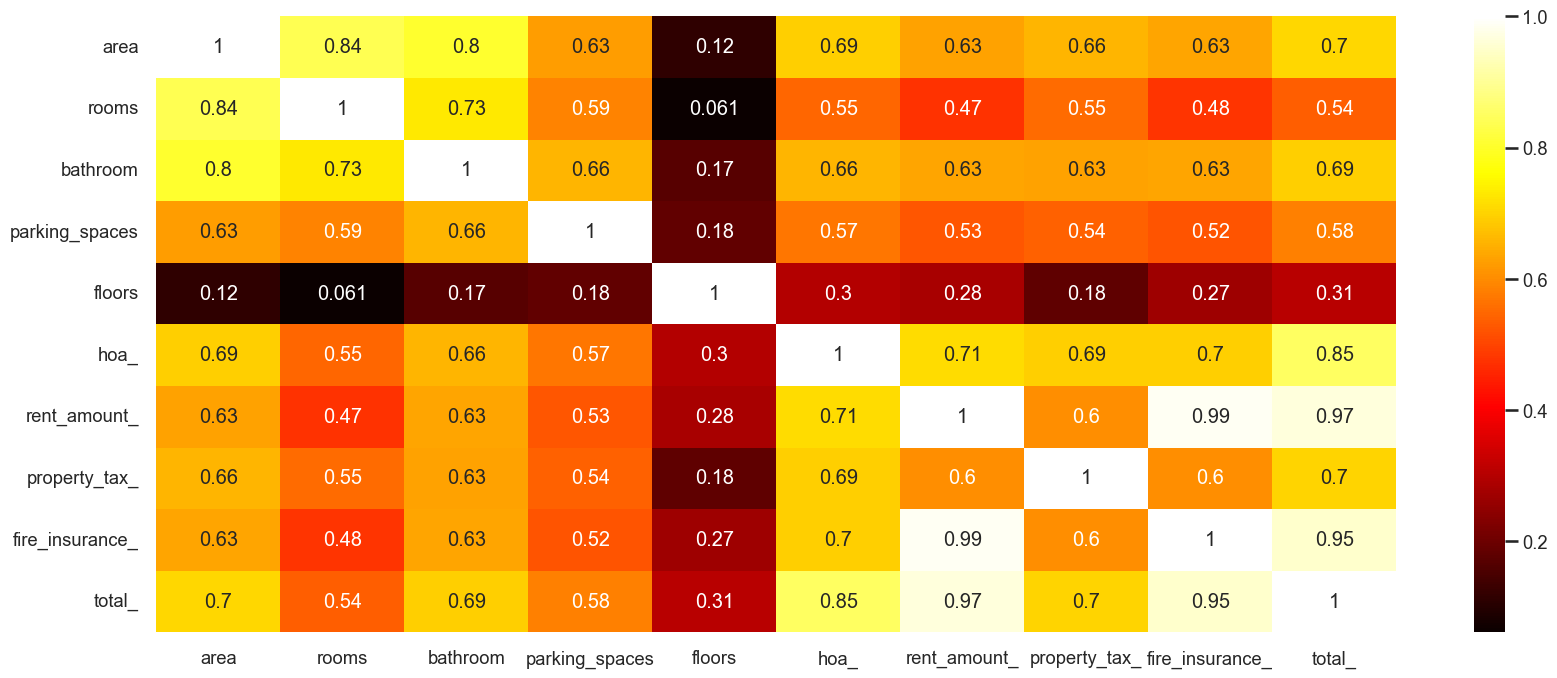

In [23]:
# Modelagem para questão 1

# Está-se utilizando o coeficiente de spearman, por ser mais indicado quando
# as variáveis a serem correlacionadas não possuirem distribuição normal - conforme visto na análise univariada.

analise_1.cor_matrix(coeficiente='spearman')

Consoante verificado, a fortíssima correlação da variável alvo 'fire_insurante_', com as variáveis 'rent_amount_' e "total_", é resultante do fato de que as duas primeiras se somam na composição do valor da última.

Assim: "rent_amount_" + "fire_insurante" + outas variáveis = 'total_'.

A equação acima é mais do que uma suposição (e, aqui entra a participação do analista de negócio, embora fosse dispensável em uma questão de conhecimento comum, como esta). Observe-se primeiro o atributo 'rent_amount_', conforme docionário de dados, trata-se do valor do aluguel. Aqui, cabe uma pergunta:

    - O aluguel, é calculado com base no valor do seguro a ser cobrado...
    
Evidente que não. Aliás, a matriz de correlação informa que, a 'area', juntamente com demais atributos (além de outros que não compõem esta base de dados) formariam o preço do aluguel. Assim, é incoerente (do ponto de vista lógico) afirmar que o aluguel é calculado sobre o valor do seguro, somente por existir uma correlação quase perfeita entre ambos.

Contudo, o contrário não será incoerente. Ora, existindo correlação numérica entre estas duas variáveis, e, descartada a opção acima, pode-se afirmar possível que o valor do seguro incêndio seja determinado pelo valor do aluguel cobrado.

O cálculo de correlação, realizado segundo coeficiente de Spearman, aponta uma correlação positiva quase perfeita entre as duas variáveis.

Vejamos.

In [ ]:
# Visualizando correlação entre 'fire_insirance_' e 'rent_amount'


analise_1.scatterplots(x = 'rent_amount_', y = 'fire_insurance_')

Evidenciado, portanto, que, à medida que o valor do aluguel aumenta, o valor do seguro incêndio o acompanha numa relação linear quase perfeita.

Confirmado, desta forma, a existência de relação linear entre 'fire_insurance_' e 'rent_amount'; e que, a última tem capacidade preditiva sobre a primeira.

Para uma respota definitiva, apresentar-se-á, adiante um teste de hipótese que rejeitará, ou não, a afirmação de que o atriburo 'rent_amount_' não possui significância estatística para determinação do atributo 'fire_insurance_'.

Para responder a questão de negócio n.1 - exploraremos a relação linear existente entre 'fire_insurance_' e 'rent_amount_'

    fire_insurante = a + 'rent_amount_'B + e


Modelagem para questão 2

Virificando a mesma matriz de correlação acima, e, atentando-se às anotações anteriores, observemos os atributos:

    - area
    - rooms
    - bathroom
    - parking_spaces
    - floors
  


In [ ]:
# Visualizando relação entre as variáveis destacadas

analise_1.pair_plots(atributos=['area', 'rooms', 'bathroom', 'parking_spaces', 'floors', 'fire_insurance_'])


Mesmo não sendo tão evidente nos gráficos, a matriz de correlação aponta uma possível correlação numérica do atributo alvo 'fire_insurance_' com os atributos 'parking_spaces', 'bathroom', 'area', numa relação linear positiva. Em de acordo com as impressões anteriores, podemos representar a relação entre as variáveis mencionadas por uma equação de função:

    fire_insurante = a + areaB + bathroomB + parking-spacesB + e



### Estimativa.

Vamos calcular os estimadores ('a' e 'B'), conforme função acima modelada para questão número 1. A partir daqui, iremos utilizar o dataset padrozinado, e com a codificação das vareáveis categóricas (caso seja necessário). Observe que o alvo foi passado como parâmetro, quando o dataset foi padronizado.

Após o cálculo, vamos visualizar a interpretar os coeficientes na etapa seguinte.



In [24]:
# Recalculando bases - dataset para questão n. 1
analise_1.bases(atributos = ['fire_insurance_', 'rent_amount_'])



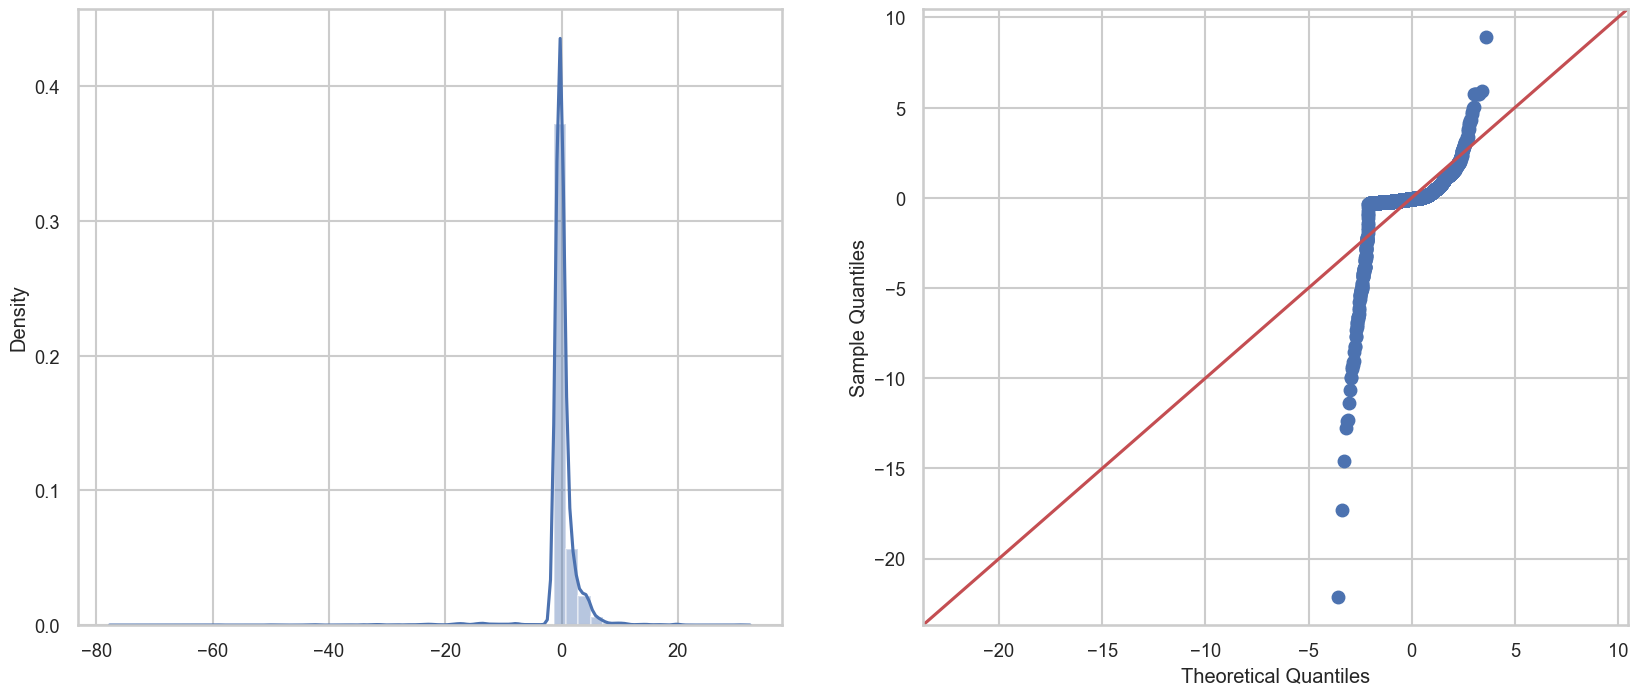

In [25]:
# Calculando regressão

analise_1.model_regression_stats()

### Inferência

Aqui, analisaremos as estatíticas dos coeficientes, e seus resultados serão usados para fazer insferências.

Antes de analisar os coeficientes, precisamos validar a segunda suposição do modelo - os erros possuem distribuição normal, e são independentes e constantes. Sem validar essas suposições, não poderemos usar as saídas estatísticas do modelo, pois certamente estatão super ou sobre estimados.

Verifiquemos se os erros são independentes, contínuos e se sua distribuição é normal.


In [26]:
# Visualizando estimadores

analise_1.resultado

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        fire_insurance_   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 5.003e+05
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:47:02   Log-Likelihood:                -15563.
No. Observations:                5870   AIC:                         3.113e+04
Df Residuals:                    5868   BIC:                         3.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.4803      0.045    926.620      0.000      41.393      41.568
rent_amount_    31.5825      0.045    707.335      0.000      31.495      31.670
==============================================================================
Omnibus:                     7515.161   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2633539.440
Skew:                          -6.779   Prob(JB):                         0.00
Kurtosis:                     105.877   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predição
